### Check arbitrariness of multi-factor

In [3038]:
def calculate_score_contribution(season_scores, baseline, event_scores, skater_scores):
    result_df = season_scores.copy()
    n_factor = skater_scores.shape[1]
    for i in range(n_factor):
        predicted_scores = (event_scores.iloc[:, [i]] @ skater_scores.iloc[:, [i]].T).unstack().reset_index()
        predicted_scores.columns = ['name', 'event', f'score_{i}']
        result_df = pd.merge(result_df, predicted_scores, on=['name', 'event'])

    result_df['baseline'] = baseline

    result_df['predicted_score'] = 0
    for i in range(n_factor):
        result_df['predicted_score'] += result_df[f'score_{i}']
    result_df['predicted_score'] += baseline
    
    contributions = []
    for i in range(n_factor):
        contributions.append(result_df[f'score_{i}'].sum() / result_df['predicted_score'].sum())
    contributions.append(baseline / result_df['predicted_score'].mean())
    
    return contributions

Alpha: 0.0005, Iter: 999, Last RMSE: 3.26, Delta RMSE: -0.0009932878
Alpha: 0.0005, Iter: 999, Last RMSE: 3.4, Delta RMSE: -0.000638904


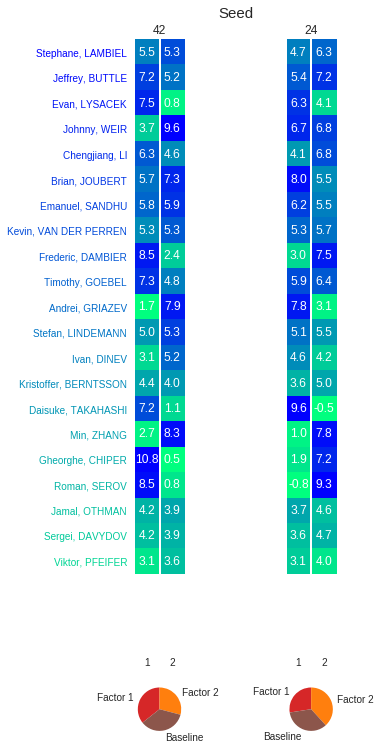

In [3061]:
winter_cmap = mpl.cm.get_cmap('winter')
fig = plt.figure(figsize=(7, 10))
seeds = [42, 24]
grid = plt.GridSpec(10, len(seeds))
n_factors = 2
year = 2005
season_scores, world_scores = get_yearly_scores(year, season_train, world_train)

for i, seed in enumerate(seeds):    
    baseline, event_scores, skater_scores = train_multi(season_scores,
    alpha=0.0005, n_iter=1000, n_factors=n_factors, init_seed=seed)
    

    avg_scores = season_scores.groupby('name')['score'].mean()
    _, world_ranking = return_ranking(avg_scores, world_scores)

    skater_scores = skater_scores.reindex(world_scores.index).dropna()
    n_skaters = skater_scores.shape[0]
    result_ranks = skater_scores.values.argsort(axis=0).argsort(axis=0)    
    ax = fig.add_subplot(grid[:-1, i])
    ax.imshow(result_ranks, cmap='winter_r')
    ax.grid(None)
            
    for j in range(n_factors):
        ax.axvline(j-0.5, lw=2, color='w')    
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels([1, 2])
    ax.set_title(seed)
    ax.set_ylim(bottom=23.5)
    ax.set_yticks(range(24))
    ax.set_facecolor('w')
    if i==0:
        pass
        ax.set_yticklabels(world_ranking)
        [t.set_color(winter_cmap(z/24)) for z, t in enumerate(ax.yaxis.get_ticklabels())]
    else:
        ax.set_yticks([])
        
    for j in range(n_skaters):
        for k in range(n_factors):
            ax.text(k, j, f'{skater_scores.iloc[j, k]:.1f}', ha='center', va='center', color='w', fontsize=12)
    
    ax.set_xlabel(' ', fontsize=15)
    axp = fig.add_subplot(grid[-1:, i])
    contributions = calculate_score_contribution(season_scores, baseline, event_scores, skater_scores)
    axp.set_aspect('equal')
    labels = [f'Factor {n+1}' for n in range(n_factor)] + ['Baseline']
    axp.pie(contributions, radius=2, labeldistance=1.3, startangle=90+contributions[0]*360, colors=['tab:red', 'tab:orange', 'tab:brown'], counterclock=False, labels=labels)
       
fig.suptitle('Seed', x=0.56, y=1.01, fontsize=15)
plt.tight_layout()
fig.savefig(f'viz/two_factor_simul_{year}.png', bbox_inches='tight')

Alpha: 0.0005, Iter: 999, Last RMSE: 4.44, Delta RMSE: -0.0001765221
Alpha: 0.0005, Iter: 999, Last RMSE: 3.81, Delta RMSE: -0.000143397


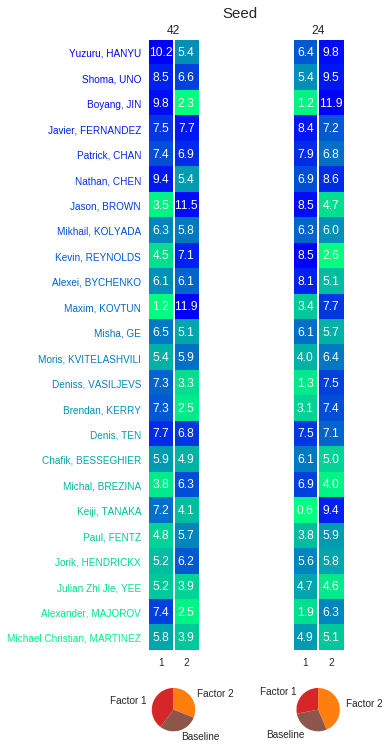

In [3062]:
winter_cmap = mpl.cm.get_cmap('winter')
fig = plt.figure(figsize=(7, 10))
seeds = [42, 24]
grid = plt.GridSpec(10, len(seeds))
n_factors = 2
year = 2017
season_scores, world_scores = get_yearly_scores(year, season_train, world_train)

for i, seed in enumerate(seeds):    
    baseline, event_scores, skater_scores = train_multi(season_scores,
    alpha=0.0005, n_iter=1000, n_factors=n_factors, init_seed=seed)
    

    avg_scores = season_scores.groupby('name')['score'].mean()
    _, world_ranking = return_ranking(avg_scores, world_scores)

    skater_scores = skater_scores.reindex(world_scores.index).dropna()
    n_skaters = skater_scores.shape[0]
    result_ranks = skater_scores.values.argsort(axis=0).argsort(axis=0)    
    ax = fig.add_subplot(grid[:-1, i])
    ax.imshow(result_ranks, cmap='winter_r')
    ax.grid(None)
            
    for j in range(n_factors):
        ax.axvline(j-0.5, lw=2, color='w')    
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels([1, 2])
    ax.set_title(seed)
    ax.set_ylim(bottom=23.5)
    ax.set_yticks(range(24))
    ax.set_facecolor('w')
    if i==0:
        pass
        ax.set_yticklabels(world_ranking)
        [t.set_color(winter_cmap(z/24)) for z, t in enumerate(ax.yaxis.get_ticklabels())]
    else:
        ax.set_yticks([])
        
    for j in range(n_skaters):
        for k in range(n_factors):
            ax.text(k, j, f'{skater_scores.iloc[j, k]:.1f}', ha='center', va='center', color='w', fontsize=12)
    
    ax.set_xlabel(' ', fontsize=15)
    axp = fig.add_subplot(grid[-1:, i])
    contributions = calculate_score_contribution(season_scores, baseline, event_scores, skater_scores)
    axp.set_aspect('equal')
    labels = [f'Factor {n+1}' for n in range(n_factor)] + ['Baseline']
    axp.pie(contributions, radius=2, labeldistance=1.3, startangle=90+contributions[0]*360, colors=['tab:red', 'tab:orange', 'tab:brown'], counterclock=False, labels=labels)
       
fig.suptitle('Seed', x=0.56, y=1.01, fontsize=15)
plt.tight_layout()
fig.savefig(f'viz/two_factor_simul_{year}.png', bbox_inches='tight')

# Sequential multi-factor model

In [2936]:
season_scores, world_scores = get_yearly_scores(2017, season_train, world_train)
sample_season_scores = season_scores.loc[[1758, 1760, 1765, 1769, 1771, 1776, 1787]]

In [3063]:
# Transform long score table to pivot form
season_pivot = pd.pivot_table(sample_season_scores[['name', 'event', 'score']], values='score', index='name', columns='event')

# Convert pivot table to numpy array
true_scores = season_pivot.values

# Store skater and event names to retrieve later
skater_names = list(season_pivot.index)
event_names = list(season_pivot.columns)

# Create lists to store scores of individual  
multi_skater_scores = []
multi_event_scores = []
multi_baselines = []

# Run gradient descent algorithm
alpha = 0.0005
n_factors = 2
init_seed = 42

for n in range(n_factors):
    # 1. Initialize baseline, event, and skater scores
    print(init_seed+n)
    random_state = np.random.RandomState(seed=init_seed+n)
    baseline = random_state.random_sample()
    skater_scores = random_state.random_sample((len(skater_names), 1))
    event_scores = random_state.random_sample((1, len(event_names)))
    
    # Run gradient descent
    for i in range(1000):
        # 2a. Calculate gradients
        predicted_scores = skater_scores @ event_scores + baseline
        residuals = predicted_scores - true_scores

        baseline_gradient = np.nansum(residuals)
        event_gradients = np.nansum(residuals * skater_scores, axis=0, keepdims=True)
        skater_gradients = np.nansum(residuals * event_scores, axis=1, keepdims=True)

        ### 2b. Update latent scores using gradients
        baseline = baseline - alpha * baseline_gradient
        event_scores = event_scores - alpha * event_gradients
        skater_scores = skater_scores - alpha * skater_gradients
    
    # Store result for each factor 
    multi_skater_scores.append(skater_scores.ravel())
    multi_event_scores.append(event_scores.ravel())
    multi_baselines.append(baseline)
    
    # Reset true score matrix as negative residual
    final_residuals = skater_scores @ event_scores + baseline - true_scores    
    true_scores = -final_residuals
    pd.DataFrame(true_scores).to_csv(f'viz/true_scores_{n}.csv')

# Create latent score matrices with previously-stored name
multi_skater_scores = pd.DataFrame(multi_skater_scores).T
multi_skater_scores.index = skater_names
multi_skater_scores.to_csv('viz/multi_skater_scores.csv')

multi_event_scores = pd.DataFrame(multi_event_scores).T
multi_event_scores.index = event_names
multi_event_scores.to_csv('viz/multi_event_scores.csv')

42
43


In [3075]:
def train_sequential_multi(season_scores, n_factors, skater_order=None, init_seed=42,
             alpha=0.0005, n_iter=1000, verbose=True, log_values=False):
    '''
    Run gradient descent on some season scores table (long format)
    Return skater and event scores (along with final RMSE and other intermediate values if needed)'''

    season_pivot = pd.pivot_table(season_scores[['name', 'event', 'score']], values='score', index='name', columns='event')
    
    if skater_order is not None:
        season_pivot = season_pivot.loc[skater_order]
        
    skater_names = list(season_pivot.index)
    event_names = list(season_pivot.columns)
    true_scores = season_pivot.values
    
    multi_skater_scores = []
    multi_event_scores = []
    multi_baselines = []
    all_residuals = []
    
    for n in range(n_factors):
        random_state = np.random.RandomState(init_seed+n)
        skater_scores = random_state.random_sample((len(skater_names), 1))
        event_scores = random_state.random_sample((1, len(event_names)))
        baseline = random_state.random_sample()
        
        for i in range(n_iter):
            # Calculate predicted scores and residuals
            predicted_scores = skater_scores @ event_scores + baseline
            residuals = predicted_scores - true_scores

            # Calculate parameter gradients
            skater_gradients = np.nansum(residuals * event_scores, axis=1, keepdims=True)
            event_gradients = np.nansum(residuals * skater_scores, axis=0, keepdims=True)
            baseline_gradient = np.nansum(residuals)

            # Update parameters
            event_scores = event_scores - alpha * event_gradients
            skater_scores = skater_scores - alpha * skater_gradients
            baseline = baseline - alpha * baseline_gradient            
        
        
            # Print difference in RMSE for last two iterations
            if verbose and i == (n_iter-1):
                rmse_old = np.sqrt(np.nanmean(residuals**2))
                residuals = skater_scores @ event_scores + baseline - true_scores
                rmse_new = np.sqrt(np.nanmean(residuals**2))
                print(f'Factor: {factor}, Alpha: {alpha}, Iter: {n_iter}, Last RMSE: {round(rmse_new, 3)}, Delta RMSE: {round(rmse_new - rmse_old, 10)}')

        multi_skater_scores.append(skater_scores.ravel())
        multi_event_scores.append(event_scores.ravel())
        multi_baselines.append(baseline)
        all_residuals.append(residuals)
        
        final_residuals = skater_scores @ event_scores + baseline - true_scores    
        true_scores = -final_residuals
        
    multi_skater_scores = pd.DataFrame(multi_skater_scores).T
    multi_skater_scores.index = skater_names
    
    multi_event_scores = pd.DataFrame(multi_event_scores).T
    multi_event_scores.index = event_names
    
    if log_values:
        return season_pivot, all_residuals, multi_baselines, multi_event_scores, multi_skater_scores
    else:
        return multi_baselines, multi_event_scores, multi_skater_scores

In [3076]:
season_scores, world_scores = get_yearly_scores(2005, season_train, world_train)
world_ranking = list(world_scores.sort_values(ascending=False).index)
season_pivot, _, baselines, event_scores, skater_scores = train_sequential_multi(season_scores, 2, log_values=True)

Factor: 4, Alpha: 0.0005, Iter: 1000, Last RMSE: 8.625, Delta RMSE: -5.04e-07
Factor: 4, Alpha: 0.0005, Iter: 1000, Last RMSE: 4.661, Delta RMSE: -0.0001577177


Double check final RMSE

In [3077]:
np.sqrt(np.nanmean((skater_scores.values @ event_scores.values.T + np.sum(baselines) - season_pivot)**2))

4.661214071665638

In [3085]:
train_years

[2005, 2006, 2007, 2009, 2010, 2012, 2013, 2014, 2016, 2017]

Factor: 4, Alpha: 0.0005, Iter: 100, Last RMSE: 8.625, Delta RMSE: -1.7543e-06
Factor: 4, Alpha: 0.0005, Iter: 100, Last RMSE: 7.873, Delta RMSE: -0.0225468177
Factor: 4, Alpha: 0.0005, Iter: 100, Last RMSE: 8.623, Delta RMSE: -2.0525e-06
Factor: 4, Alpha: 0.0005, Iter: 100, Last RMSE: 8.548, Delta RMSE: -0.0021735136


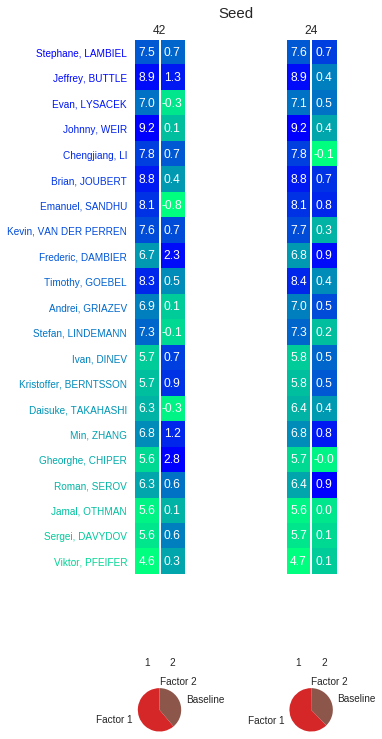

In [3087]:
winter_cmap = mpl.cm.get_cmap('winter')
fig = plt.figure(figsize=(7, 10))
seeds = [42, 24]
grid = plt.GridSpec(10, len(seeds))
year = 2005
n_factors = 2
season_scores, world_scores = get_yearly_scores(year, season_train, world_train)

for i, seed in enumerate(seeds):    
    baselines, event_scores, skater_scores = train_sequential_multi(season_scores,
    alpha=0.0005, n_iter=100, n_factors=n_factors, init_seed=seed)

    avg_scores = season_scores.groupby('name')['score'].mean()
    _, world_ranking = return_ranking(avg_scores, world_scores)

    skater_scores = skater_scores.reindex(world_scores.index).dropna()
    n_skaters = skater_scores.shape[0]
    result_ranks = skater_scores.values.argsort(axis=0).argsort(axis=0)    
    ax = fig.add_subplot(grid[:-1, i])
    ax.imshow(result_ranks, cmap='winter_r')
    ax.grid(None)
            
    for j in range(n_factors):
        ax.axvline(j-0.5, lw=2, color='w')    
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels([1, 2])
    ax.set_title(seed)
    ax.set_ylim(bottom=23.5)
    ax.set_yticks(range(24))
    ax.set_facecolor('w')
    if i==0:
        pass
        ax.set_yticklabels(world_ranking)
        [t.set_color(winter_cmap(z/24)) for z, t in enumerate(ax.yaxis.get_ticklabels())]
    else:
        ax.set_yticks([])
        
    for j in range(n_skaters):
        for k in range(n_factors):
            ax.text(k, j, f'{skater_scores.iloc[j, k]:.1f}', ha='center', va='center', color='w', fontsize=12)
    
    ax.set_xlabel(' ', fontsize=15)
    axp = fig.add_subplot(grid[-1:, i])
    contributions = calculate_score_contribution(season_scores, np.sum(baselines), event_scores, skater_scores)
    axp.set_aspect('equal')
    labels = [f'Factor {n+1}' for n in range(n_factor)] + ['Baseline']
    axp.pie(contributions, radius=2, labeldistance=1.3, startangle=90+contributions[0]*360, colors=['tab:red', 'tab:orange', 'tab:brown'], counterclock=False, labels=labels)
       
fig.suptitle('Seed', x=0.56, y=1.01, fontsize=15)
plt.tight_layout()
fig.savefig(f'viz/two_factor_seq_{year}.png', bbox_inches='tight')

Factor: 4, Alpha: 0.0005, Iter: 100, Last RMSE: 8.859, Delta RMSE: -2.073e-07
Factor: 4, Alpha: 0.0005, Iter: 100, Last RMSE: 8.782, Delta RMSE: -0.0025331584
Factor: 4, Alpha: 0.0005, Iter: 100, Last RMSE: 8.859, Delta RMSE: -1.859e-07
Factor: 4, Alpha: 0.0005, Iter: 100, Last RMSE: 8.186, Delta RMSE: -0.0234028276


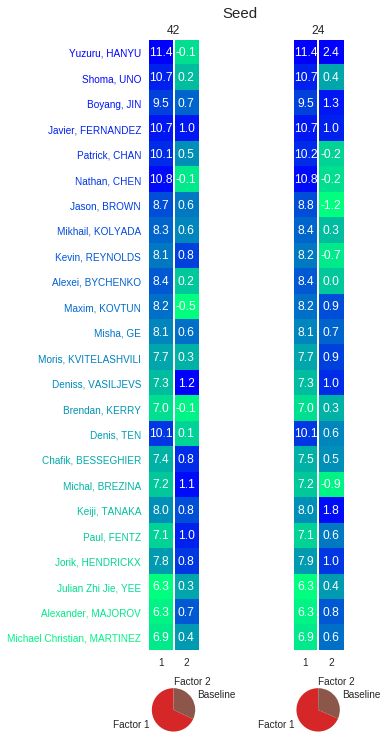

In [3079]:
winter_cmap = mpl.cm.get_cmap('winter')
fig = plt.figure(figsize=(7, 10))
seeds = [42, 24]
grid = plt.GridSpec(10, len(seeds))
year = 2017
n_factors = 2
season_scores, world_scores = get_yearly_scores(year, season_train, world_train)

for i, seed in enumerate(seeds):    
    baselines, event_scores, skater_scores = train_sequential_multi(season_scores,
    alpha=0.0005, n_iter=100, n_factors=n_factors, init_seed=seed)

    avg_scores = season_scores.groupby('name')['score'].mean()
    _, world_ranking = return_ranking(avg_scores, world_scores)

    skater_scores = skater_scores.reindex(world_scores.index).dropna()
    n_skaters = skater_scores.shape[0]
    result_ranks = skater_scores.values.argsort(axis=0).argsort(axis=0)    
    ax = fig.add_subplot(grid[:-1, i])
    ax.imshow(result_ranks, cmap='winter_r')
    ax.grid(None)
            
    for j in range(n_factors):
        ax.axvline(j-0.5, lw=2, color='w')    
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels([1, 2])
    ax.set_title(seed)
    ax.set_ylim(bottom=23.5)
    ax.set_yticks(range(24))
    ax.set_facecolor('w')
    if i==0:
        pass
        ax.set_yticklabels(world_ranking)
        [t.set_color(winter_cmap(z/24)) for z, t in enumerate(ax.yaxis.get_ticklabels())]
    else:
        ax.set_yticks([])
        
    for j in range(n_skaters):
        for k in range(n_factors):
            ax.text(k, j, f'{skater_scores.iloc[j, k]:.1f}', ha='center', va='center', color='w', fontsize=12)
    
    ax.set_xlabel(' ', fontsize=15)
    axp = fig.add_subplot(grid[-1:, i])
    contributions = calculate_score_contribution(season_scores, np.sum(baselines), event_scores, skater_scores)
    axp.set_aspect('equal')
    labels = [f'Factor {n+1}' for n in range(n_factor)] + ['Baseline']
    axp.pie(contributions, radius=2, labeldistance=1.3, startangle=90+contributions[0]*360, colors=['tab:red', 'tab:orange', 'tab:brown'], counterclock=False, labels=labels)
       
fig.suptitle('Seed', x=0.56, y=1.01, fontsize=15)
plt.tight_layout()
fig.savefig(f'viz/two_factor_seq_{year}.png', bbox_inches='tight')

Effect of seed

In [1973]:
season_scores, world_scores = get_yearly_scores(2017, season_train, world_train)
world_ranking = list(world_scores.sort_values(ascending=False).index)
season_pivot = pd.pivot_table(season_scores[['name', 'event', 'score']], values='score', index='name', columns='event')

In [1974]:
skater_names = list(season_pivot.index)
event_names = list(season_pivot.columns)
true_scores = season_pivot.values
n_factor = 30
alpha = 0.0005
n_iter = 1000
counter = 0

Train for the first few factors

In [1976]:
for factor in range(n_factor):
    random_state = np.random.RandomState(42)
    skater_scores = random_state.random_sample((true_scores.shape[0], 1))
    event_scores = random_state.random_sample((1, true_scores.shape[1]))
    baseline = random_state.random_sample()

    for i in range(1000):
        # Calculate predicted scores and residuals
        predicted_scores = skater_scores @ event_scores + baseline
        residuals = predicted_scores - true_scores

        # Calculate parameter gradients
        skater_gradients = np.nansum(residuals * event_scores, axis=1, keepdims=True)
        event_gradients = np.nansum(residuals * skater_scores, axis=0, keepdims=True)
        baseline_gradient = np.nansum(residuals)

        # Update parameters
        event_scores = event_scores - alpha * event_gradients
        skater_scores = skater_scores - alpha * skater_gradients
        baseline = baseline - alpha * baseline_gradient            


        # Print difference in RMSE for last two iterations
        if i == (n_iter-1):
            rmse_old = np.sqrt(np.nanmean(residuals**2))
            residuals = skater_scores @ event_scores + baseline - true_scores
            rmse_new = np.sqrt(np.nanmean(residuals**2))
            print(rmse_old, rmse_new)
            print(f'Factor: {factor}, Alpha: {alpha}, Iter: {n_iter}, Last RMSE: {round(rmse_new, 3)}, Delta RMSE: {round(rmse_new - rmse_old, 10)}')
    #                 print(np.nansum(skater_scores @ event_scores))

    true_scores = -residuals

0.7759798376657842 0.77594943745152
Factor: 0, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.776, Delta RMSE: -3.04002e-05
0.7760738230747388 0.7760433853347345
Factor: 1, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.776, Delta RMSE: -3.04377e-05
0.7761511922234977 0.7761207235699984
Factor: 2, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.776, Delta RMSE: -3.04687e-05
0.7762148768798346 0.7761843827655299
Factor: 3, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.776, Delta RMSE: -3.04941e-05
0.7762672934518264 0.7762367783714375
Factor: 4, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.776, Delta RMSE: -3.05151e-05
0.7763104329537123 0.7762799006110476
Factor: 5, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.776, Delta RMSE: -3.05323e-05
0.7763459354752473 0.7763153889215562
Factor: 6, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.776, Delta RMSE: -3.05466e-05
0.7763751517484961 0.7763445934968727
Factor: 7, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.776, Delta RMSE: -3.05583e-05
0.7763991940068229 0.7763686261267432
Factor: 8, A

Check seed effect for next factor (change seed for random_state object)

In [1978]:
random_state = np.random.RandomState(10)
skater_scores = random_state.random_sample((true_scores.shape[0], 1))
event_scores = random_state.random_sample((1, true_scores.shape[1]))
baseline = random_state.random_sample()

for i in range(1000):
    # Calculate predicted scores and residuals
    predicted_scores = skater_scores @ event_scores + baseline
    residuals = predicted_scores - true_scores

    # Calculate parameter gradients
    skater_gradients = np.nansum(residuals * event_scores, axis=1, keepdims=True)
    event_gradients = np.nansum(residuals * skater_scores, axis=0, keepdims=True)
    baseline_gradient = np.nansum(residuals)

    # Update parameters
    event_scores = event_scores - alpha * event_gradients
    skater_scores = skater_scores - alpha * skater_gradients
    baseline = baseline - alpha * baseline_gradient            


    # Print difference in RMSE for last two iterations
#     if i == (n_iter-1):
    rmse_old = np.sqrt(np.nanmean(residuals**2))
    residuals = skater_scores @ event_scores + baseline - true_scores
    rmse_new = np.sqrt(np.nanmean(residuals**2))
    print(rmse_old, rmse_new)
    print(f'Factor: {factor}, Alpha: {alpha}, Iter: {n_iter}, Last RMSE: {round(rmse_new, 3)}, Delta RMSE: {round(rmse_new - rmse_old, 10)}')

0.9931827216110535 0.9693547568891577
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.969, Delta RMSE: -0.0238279647
0.9693547568891577 0.9479033607900772
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.948, Delta RMSE: -0.0214513961
0.9479033607900772 0.9286258835671742
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.929, Delta RMSE: -0.0192774772
0.9286258835671742 0.9113313375259368
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.911, Delta RMSE: -0.017294546
0.9113313375259368 0.8958404896128643
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.896, Delta RMSE: -0.0154908479
0.8958404896128643 0.8819858728623596
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.882, Delta RMSE: -0.0138546168
0.8819858728623596 0.8696117035058516
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.87, Delta RMSE: -0.0123741694
0.8696117035058516 0.8585736987694531
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.859, Delta RMSE: -0.0110380047
0.8585736987694531 0.8487387975671

0.7609080923299184 0.7608021385429823
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.761, Delta RMSE: -0.0001059538
0.7608021385429823 0.7606962149360725
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.761, Delta RMSE: -0.0001059236
0.7606962149360725 0.7605903204637983
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.761, Delta RMSE: -0.0001058945
0.7605903204637983 0.7604844540892315
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.76, Delta RMSE: -0.0001058664
0.7604844540892315 0.7603786147835202
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.76, Delta RMSE: -0.0001058393
0.7603786147835202 0.760272801525544
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.76, Delta RMSE: -0.0001058133
0.760272801525544 0.7601670133016074
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.76, Delta RMSE: -0.0001057882
0.7601670133016074 0.7600612491051651
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.76, Delta RMSE: -0.0001057642
0.7600612491051651 0.759955507936578
Fa

0.7487015435607616 0.7485935068879783
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.749, Delta RMSE: -0.0001080367
0.7485935068879783 0.7484854120520054
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.748, Delta RMSE: -0.0001080948
0.7484854120520054 0.7483772584970153
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.748, Delta RMSE: -0.0001081536
0.7483772584970153 0.748269045670186
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.748, Delta RMSE: -0.0001082128
0.748269045670186 0.7481607730216908
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.748, Delta RMSE: -0.0001082726
0.7481607730216908 0.7480524400046861
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.748, Delta RMSE: -0.000108333
0.7480524400046861 0.7479440460753011
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.748, Delta RMSE: -0.0001083939
0.7479440460753011 0.7478355906926262
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.748, Delta RMSE: -0.0001084554
0.7478355906926262 0.74772707331870

0.7335240235977497 0.733404309300729
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.733, Delta RMSE: -0.0001197143
0.733404309300729 0.7332844860348701
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.733, Delta RMSE: -0.0001198233
0.7332844860348701 0.7331645535843833
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.733, Delta RMSE: -0.0001199325
0.7331645535843833 0.7330445117357496
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.733, Delta RMSE: -0.0001200418
0.7330445117357496 0.7329243602777189
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.733, Delta RMSE: -0.0001201515
0.7329243602777189 0.7328040990013078
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.733, Delta RMSE: -0.0001202613
0.7328040990013078 0.7326837276997983
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.733, Delta RMSE: -0.0001203713
0.7326837276997983 0.7325632461687351
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.733, Delta RMSE: -0.0001204815
0.7325632461687351 0.7324426542059

0.717399595298925 0.7172650574161517
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.717, Delta RMSE: -0.0001345379
0.7172650574161517 0.7171304008608026
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.717, Delta RMSE: -0.0001346566
0.7171304008608026 0.716995625694695
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.717, Delta RMSE: -0.0001347752
0.716995625694695 0.7168607319817455
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.717, Delta RMSE: -0.0001348937
0.7168607319817455 0.716725719787969
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.717, Delta RMSE: -0.0001350122
0.716725719787969 0.7165905891814769
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.717, Delta RMSE: -0.0001351306
0.7165905891814769 0.7164553402324751
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.716, Delta RMSE: -0.0001352489
0.7164553402324751 0.7163199730132619
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.716, Delta RMSE: -0.0001353672
0.7163199730132619 0.7161844875982262

Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.698, Delta RMSE: -0.0001494665
0.6976180356798927 0.697468477735098
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.697, Delta RMSE: -0.0001495579
0.697468477735098 0.697318828667351
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.697, Delta RMSE: -0.0001496491
0.697318828667351 0.6971690888010734
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.697, Delta RMSE: -0.0001497399
0.6971690888010734 0.6970192584622613
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.697, Delta RMSE: -0.0001498303
0.6970192584622613 0.6968693379784773
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.697, Delta RMSE: -0.0001499205
0.6968693379784773 0.6967193276788458
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.697, Delta RMSE: -0.0001500103
0.6967193276788458 0.6965692278940466
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.697, Delta RMSE: -0.0001500998
0.6965692278940466 0.6964190389563081
Factor: 29, Alpha: 0.0005, Iter: 100

0.6778597295341556 0.677701608914549
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.678, Delta RMSE: -0.0001581206
0.677701608914549 0.6775434490914001
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.678, Delta RMSE: -0.0001581598
0.6775434490914001 0.6773852505312509
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.677, Delta RMSE: -0.0001581986
0.6773852505312509 0.6772270137012206
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.677, Delta RMSE: -0.0001582368
0.6772270137012206 0.6770687390689961
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.677, Delta RMSE: -0.0001582746
0.6770687390689961 0.6769104271028233
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.677, Delta RMSE: -0.000158312
0.6769104271028233 0.6767520782714982
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.677, Delta RMSE: -0.0001583488
0.6767520782714982 0.6765936930443579
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.677, Delta RMSE: -0.0001583852
0.6765936930443579 0.67643527189127

0.6577832463708242 0.6576239582663224
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.658, Delta RMSE: -0.0001592881
0.6576239582663224 0.6574646913816728
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.657, Delta RMSE: -0.0001592669
0.6574646913816728 0.6573054461864979
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.657, Delta RMSE: -0.0001592452
0.6573054461864979 0.657146223149913
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.657, Delta RMSE: -0.000159223
0.657146223149913 0.6569870227405195
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.657, Delta RMSE: -0.0001592004
0.6569870227405195 0.6568278454263969
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.657, Delta RMSE: -0.0001591773
0.6568278454263969 0.6566686916750961
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.657, Delta RMSE: -0.0001591538
0.6566686916750961 0.6565095619536311
Factor: 29, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.657, Delta RMSE: -0.0001591297
0.6565095619536311 0.65635045672847

In [1981]:
season_scores, world_scores = get_yearly_scores(2017, season_train, world_train)
world_ranking = list(world_scores.sort_values(ascending=False).index)
season_pivot, _, baselines, event_scores, skater_scores = train_sequential_multi(season_scores, 64, log_values=True)

42
8.859330961850546 8.859330944411616
Factor: 0, Alpha: 0.0005, Iter: 1000, Last RMSE: 8.859, Delta RMSE: -1.74e-08
43
5.8053937470994 5.8052895329155
Factor: 1, Alpha: 0.0005, Iter: 1000, Last RMSE: 5.805, Delta RMSE: -0.0001042142
44
2.7521162417336558 2.751871190166965
Factor: 2, Alpha: 0.0005, Iter: 1000, Last RMSE: 2.752, Delta RMSE: -0.0002450516
45
1.2305645457141914 1.230349413021204
Factor: 3, Alpha: 0.0005, Iter: 1000, Last RMSE: 1.23, Delta RMSE: -0.0002151327
46
0.8005360818874533 0.800373873666347
Factor: 4, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.8, Delta RMSE: -0.0001622082
47
0.6614323535056265 0.6612623476836447
Factor: 5, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.661, Delta RMSE: -0.0001700058
48
0.6116974341790589 0.6115888633897472
Factor: 6, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.612, Delta RMSE: -0.0001085708
49
0.4920523652213367 0.4918850137596573
Factor: 7, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.492, Delta RMSE: -0.0001673515
50
0.47482029770122547 0.474797523

In [1986]:
np.sqrt(np.nanmean((skater_scores.values @ event_scores.values + np.sum(baselines) - season_pivot)**2))

0.19106916012531366

### Animation

In [2208]:
season_scores, world_scores = get_yearly_scores(2017, season_train, world_train)
world_ranking = list(world_scores.sort_values(ascending=False).index)
season_pivot = pd.pivot_table(season_scores[['name', 'event', 'score']], values='score', index='name', columns='event')
example_skater_order = np.load('viz/example_skater_order.npy')
# example_skater_order = example_skater_order[::-1]
season_pivot = season_pivot.loc[example_skater_order]        
skater_names = list(season_pivot.index)
event_names = list(season_pivot.columns)


n_skaters = len(skater_names)
n_events = len(event_names)

In [2320]:
n_factor = 5
n_iter = 1000
log_every= 100
alpha = 0.0005

true_scores = season_pivot.values
multi_skater_scores = np.zeros((n_skaters, n_factor))
multi_event_scores = np.zeros((n_factor, n_events))

all_skater_scores = []
all_event_scores = []
all_baselines = []
all_residuals = []
all_rmses = []
all_iters = []
all_factors = []
all_iters = []
all_cum_iters = []

cum_iter_log = 0
for seed, factor in enumerate(range(n_factor)):
    print('factor', factor)
    random_state = np.random.RandomState(seed)
    skater_scores = random_state.random_sample((true_scores.shape[0], 1))
    event_scores = random_state.random_sample((1, true_scores.shape[1]))
    baseline = random_state.random_sample()

    for i in range(n_iter):
        # Calculate predicted scores and residuals
        predicted_scores = skater_scores @ event_scores + baseline
        residuals = predicted_scores - true_scores
        
        if i%log_every==0:
            all_residuals.append(residuals)
            all_skater_scores.append(multi_skater_scores.copy())
            all_event_scores.append(multi_event_scores.copy())
            all_baselines.append(baseline)
            all_rmses.append(np.sqrt(np.nanmean(residuals**2)))
            all_iters.append(i)
            all_cum_iters.append(cum_iter_log)
            cum_iter_log += log_every

        # Calculate parameter gradients
        skater_gradients = np.nansum(residuals * event_scores, axis=1, keepdims=True)
        event_gradients = np.nansum(residuals * skater_scores, axis=0, keepdims=True)
        baseline_gradient = np.nansum(residuals)

        # Update parameters
        event_scores = event_scores - alpha * event_gradients
        skater_scores = skater_scores - alpha * skater_gradients
        baseline = baseline - alpha * baseline_gradient            


        # Print difference in RMSE for last two iterations
        if i == (n_iter-1):
            rmse_old = np.sqrt(np.nanmean(residuals**2))
            residuals = skater_scores @ event_scores + baseline - true_scores
            rmse_new = np.sqrt(np.nanmean(residuals**2))
            print(rmse_old, rmse_new)
            print(f'Factor: {factor}, Alpha: {alpha}, Iter: {n_iter}, Last RMSE: {round(rmse_new, 3)}, Delta RMSE: {round(rmse_new - rmse_old, 10)}')

        multi_skater_scores[:, [factor]] = skater_scores
        multi_event_scores[[factor], :] = event_scores

    true_scores = -residuals

factor 0
8.859733840983326 8.859733822256603
Factor: 0, Alpha: 0.0005, Iter: 1000, Last RMSE: 8.86, Delta RMSE: -1.87e-08
factor 1
5.597465731200726 5.597423540962756
Factor: 1, Alpha: 0.0005, Iter: 1000, Last RMSE: 5.597, Delta RMSE: -4.21902e-05
factor 2
3.2418755764811054 3.2417148272307816
Factor: 2, Alpha: 0.0005, Iter: 1000, Last RMSE: 3.242, Delta RMSE: -0.0001607493
factor 3
1.1274996512995912 1.1273606838097951
Factor: 3, Alpha: 0.0005, Iter: 1000, Last RMSE: 1.127, Delta RMSE: -0.0001389675
factor 4
0.8286438951652468 0.8283973705662461
Factor: 4, Alpha: 0.0005, Iter: 1000, Last RMSE: 0.828, Delta RMSE: -0.0002465246


In [2360]:
def update(i, fig, ax, axr, baseline_text, verbose=False):
    if verbose:
        print(i, end=' ')
    
    fig.suptitle(f'Iteration {all_cum_iters[i]}\nα = 0.0005', x=0.3, y=0.95, va='bottom', ha='center', fontsize=20)
    residuals = all_residuals[i]
    ax.imshow(residuals, cmap='coolwarm_r', vmin=-30, vmax=30, aspect='auto')
    
    skater_score_display = pd.DataFrame(all_skater_scores[i]).applymap('{:5.2f}'.format).apply(lambda x: '  '.join(x), axis=1)
    event_score_display = pd.DataFrame(all_event_scores[i]).applymap('{:5.2f}'.format).apply(lambda x: '\n'.join(x), axis=0)
    ax.set_yticklabels(skater_score_display, fontsize=10)
    ax.set_xticklabels(event_score_display, fontsize=10) 
    
    baseline_text.set_text('{0:.2f}'.format(all_baselines[i]))
    
    axr.plot(all_cum_iters[i-1:i+1], all_rmses[i-1:i+1], '.-', color='tab:brown', clip_on=True)

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 0 

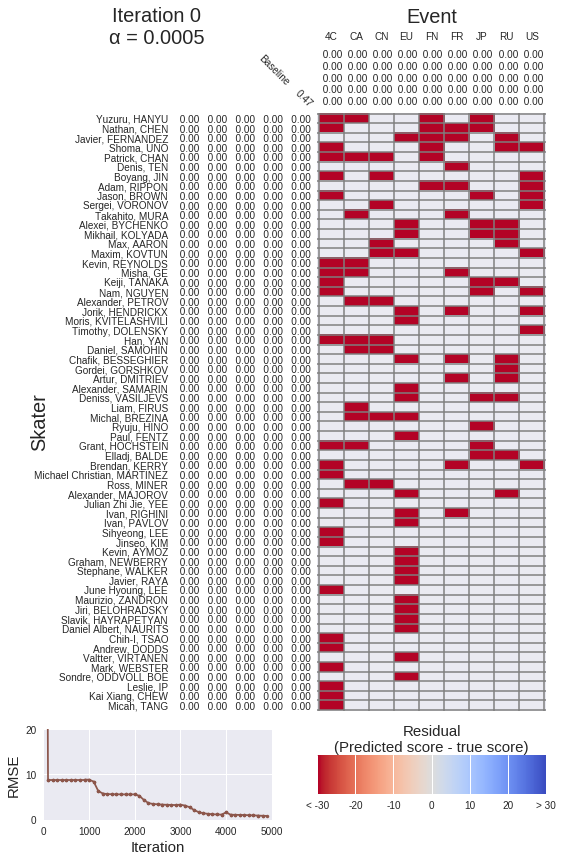

In [2372]:
# Set up figure grid
fig = plt.figure(figsize=(9, 13))
grid = plt.GridSpec(20, 2, hspace=1)

# Set up heat map of residuals
ax = fig.add_subplot(grid[:-3, 1])
ax.set_xticks(range(n_events))
ax.set_xticklabels(event_names)
ax.set_xticks(np.arange(n_events+1)-0.5, minor=True)
ax.xaxis.tick_top()
ax.set_xlim(-0.55, n_events-0.45)

ax.set_yticks(range(n_skaters))
ax.set_yticklabels(skater_names)
ax.set_yticks(np.arange(n_skaters+1)-0.5, minor=True)
ax.set_ylim(-0.6, n_skaters-0.45)

ax.grid(which='minor', color='tab:gray', ls='-', lw=1.5)
ax.grid(None, which='major')

baseline_text = ax.text(x=-0.7, y=len(skater_names), s='', rotation=-45, va='bottom', ha='right')

# ax.imshow(all_residuals[(0, 0)], cmap='coolwarm_r', vmin=-30, vmax=30, aspect='auto')

for i, skater in enumerate(skater_names):
    ax.text(x=-6.5, y=i-0.4, s=skater, ha='right')
for i, event in enumerate(event_names):
    ax.text(x=i, y=len(skater_names)+7, s=event, va='bottom', ha='center')
ax.text(x=-1.6, y=len(skater_names)+2.3, s='Baseline', rotation=-45, va='bottom', ha='right')
baseline_text = ax.text(x=-0.7, y=len(skater_names), s='', rotation=-45, va='bottom', ha='right')

ax.text(x=-12, y=len(skater_names)/2, s='Skater', rotation=90, fontsize=20)
ax.text(x=4, y=len(skater_names)+9, s='Event', fontsize=20, ha='center')


axr = fig.add_subplot(grid[-3:, 0])
axr.set_xlim(0, 5000)
axr.set_xticks(range(0, 5001, 1000))
axr.set_xlabel('Iteration', fontsize=15)
axr.set_ylim(0, 20)
axr.set_yticks(np.arange(0, 21, 10))
axr.set_ylabel('RMSE', fontsize=15)


axc = fig.add_subplot(grid[-3:, 1])
cmap = plt.cm.get_cmap('coolwarm')
colors = cmap(np.arange(cmap.N, -1, -1)) # Plot colorbar from red to blue (not blue to red)
axc.imshow([colors], extent=[-30, 30, 0, 10])
axc.xaxis.set_label_position('top') 
axc.set_xlabel('Residual\n(Predicted score - true score)', fontsize=15)
axc.set_xticklabels(['< -30', '-20', '-10', '0', '10', '20', '> 30'])
axc.set_yticks([])

anim = FuncAnimation(fig, lambda i: update(i, fig, ax, axr, baseline_text, verbose=True), 
                     frames=len(all_cum_iters), interval=500)


anim.save('viz/seq_anim_multi.gif', writer='imagemagick')

### Changing the number of factors

In [2060]:
def cross_val_sequential(n_factor, years1, years2,
                        season_scores_df, world_scores_df, avg_taus):
    X1 = {}
    X2 = {}

    for year in (years1 + years2):
        print(year, end=' ')
        
        # Step 1: train multi-factor model
        season_scores, world_scores = get_yearly_scores(year, season_scores_df, world_scores_df)
        skater_scores = train_sequential_multi(season_scores, n_factor, alpha=0.0005, n_iter=1001, verbose=True)
        
        # Normalize and take pairwise differences
        skater_scores = skater_scores.reindex(world_scores.index).dropna()
        normed_skater_scores = (skater_scores - skater_scores.mean(axis=0)) / skater_scores.std(axis=0)
        X = np.array(list(skater1 - skater2 for skater1, skater2 in combinations(normed_skater_scores.values, 2)))
        
        # Store difference matrices for each year
        if year in years1:
            X1[year] = X
        else:
            X2[year] = X
    
    # Stack predictor matrices for both folds
    stacked_X1 = np.concatenate(list(X1.values()))
    stacked_X2 = np.concatenate(list(X2.values()))
    
    # Step 2: train logistic regression model for both folds
    print('1st fold')
    beta1 = log_gradient_ascent(stacked_X1, n_iter=1001, alpha=0.0005)
    print('2nd fold')
    beta2 = log_gradient_ascent(stacked_X2, n_iter=1001, alpha=0.0005)
    
    # Step 3 & 4: evaluate logistic regression model on both folds
    dtaus_train = {}
    dtaus_val = {}
    for year in years1:
        dtaus_train[year] = get_tau_from_X_beta(X1[year], beta1) - avg_taus[year]
        dtaus_val[year] = get_tau_from_X_beta(X1[year], beta2) - avg_taus[year]
    for year in years2:
        dtaus_train[year] = get_tau_from_X_beta(X2[year], beta2) - avg_taus[year]
        dtaus_val[year] = get_tau_from_X_beta(X2[year], beta1) - avg_taus[year]
        
    return dtaus_train, dtaus_val

In [1987]:
n_factors = 2**np.arange(1, 8)
dtaus_train_all = {}
dtaus_val_all = {}

for n_factor in n_factors:
    print(f'{n_factor} factors')
    dtaus_train, dtaus_val = cross_val_sequential(n_factor, years1, years2, all_season_scores, all_world_scores, avg_taus)
    dtaus_train_all[n_factor] = dtaus_train
    dtaus_val_all[n_factor] = dtaus_val

2 factors
2016 42
10.97978956435381 10.979789508647762
Factor: 0, Alpha: 0.0005, Iter: 1001, Last RMSE: 10.98, Delta RMSE: -5.57e-08
43
4.714781703679778 4.714717269700999
Factor: 1, Alpha: 0.0005, Iter: 1001, Last RMSE: 4.715, Delta RMSE: -6.4434e-05
2006 42
7.951429196266698 7.9514284273170075
Factor: 0, Alpha: 0.0005, Iter: 1001, Last RMSE: 7.951, Delta RMSE: -7.689e-07
43
5.050259961679956 5.050138716833048
Factor: 1, Alpha: 0.0005, Iter: 1001, Last RMSE: 5.05, Delta RMSE: -0.0001212448
2012 42
8.306335920586108 8.306335355601862
Factor: 0, Alpha: 0.0005, Iter: 1001, Last RMSE: 8.306, Delta RMSE: -5.65e-07
43
4.494057382444441 4.4938542514351605
Factor: 1, Alpha: 0.0005, Iter: 1001, Last RMSE: 4.494, Delta RMSE: -0.000203131
2005 42
8.624535445075427 8.624534941079222
Factor: 0, Alpha: 0.0005, Iter: 1001, Last RMSE: 8.625, Delta RMSE: -5.04e-07
43
4.661213408354145 4.661056108895763
Factor: 1, Alpha: 0.0005, Iter: 1001, Last RMSE: 4.661, Delta RMSE: -0.0001572995
2014 42
8.79728255

0.6656826576701907 0.6654793364358484
Factor: 5, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.665, Delta RMSE: -0.0002033212
48
0.6187085951954402 0.6186587835923588
Factor: 6, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.619, Delta RMSE: -4.98116e-05
49
0.5841705384207176 0.5841235695821149
Factor: 7, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.584, Delta RMSE: -4.69688e-05
2006 42
7.951429196266698 7.9514284273170075
Factor: 0, Alpha: 0.0005, Iter: 1001, Last RMSE: 7.951, Delta RMSE: -7.689e-07
43
5.050259961679956 5.050138716833048
Factor: 1, Alpha: 0.0005, Iter: 1001, Last RMSE: 5.05, Delta RMSE: -0.0001212448
44
3.201072927658075 3.2009417157091016
Factor: 2, Alpha: 0.0005, Iter: 1001, Last RMSE: 3.201, Delta RMSE: -0.0001312119
45
1.9583479667330101 1.958187177143537
Factor: 3, Alpha: 0.0005, Iter: 1001, Last RMSE: 1.958, Delta RMSE: -0.0001607896
46
1.360845168919777 1.3604857968522561
Factor: 4, Alpha: 0.0005, Iter: 1001, Last RMSE: 1.36, Delta RMSE: -0.0003593721
47
1.1597709346936178 1.159

1.2300427134447356 1.229828710978028
Factor: 3, Alpha: 0.0005, Iter: 1001, Last RMSE: 1.23, Delta RMSE: -0.0002140025
46
0.8000395356899266 0.7998776516805859
Factor: 4, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.8, Delta RMSE: -0.000161884
47
0.6608857071970142 0.6607159928539273
Factor: 5, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.661, Delta RMSE: -0.0001697143
48
0.6112062729963523 0.6110979371900971
Factor: 6, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.611, Delta RMSE: -0.0001083358
49
0.4916078394089416 0.4914409073450184
Factor: 7, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.491, Delta RMSE: -0.0001669321
1st fold
Alpha: 0.0005, Iter: 1000, Last LL: -0.34, Delta LL: 0.0
2nd fold
Alpha: 0.0005, Iter: 1000, Last LL: -0.37, Delta LL: 0.0
16 factors
2016 42
10.97978956435381 10.979789508647762
Factor: 0, Alpha: 0.0005, Iter: 1001, Last RMSE: 10.98, Delta RMSE: -5.57e-08
43
4.714781703679778 4.714717269700999
Factor: 1, Alpha: 0.0005, Iter: 1001, Last RMSE: 4.715, Delta RMSE: -6.4434e-05
44
2.088

0.5125538441994008 0.5125414042992696
Factor: 13, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.513, Delta RMSE: -1.24399e-05
56
0.504367518849618 0.5043421350170119
Factor: 14, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.504, Delta RMSE: -2.53838e-05
57
0.4867951986100039 0.4867726649408962
Factor: 15, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.487, Delta RMSE: -2.25337e-05
2014 42
8.797282557508751 8.797282501580717
Factor: 0, Alpha: 0.0005, Iter: 1001, Last RMSE: 8.797, Delta RMSE: -5.59e-08
43
5.957009768857439 5.956971133371786
Factor: 1, Alpha: 0.0005, Iter: 1001, Last RMSE: 5.957, Delta RMSE: -3.86355e-05
44
3.084488356302727 3.0843594078614722
Factor: 2, Alpha: 0.0005, Iter: 1001, Last RMSE: 3.084, Delta RMSE: -0.0001289484
45
1.7286913210294463 1.728460974352728
Factor: 3, Alpha: 0.0005, Iter: 1001, Last RMSE: 1.728, Delta RMSE: -0.0002303467
46
0.9052607733367564 0.9051212311431819
Factor: 4, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.905, Delta RMSE: -0.0001395422
47
0.5495122961262879 0.54

8.912059572513403 8.912059256860468
Factor: 0, Alpha: 0.0005, Iter: 1001, Last RMSE: 8.912, Delta RMSE: -3.157e-07
43
5.1845408465186065 5.184372155131952
Factor: 1, Alpha: 0.0005, Iter: 1001, Last RMSE: 5.184, Delta RMSE: -0.0001686914
44
2.8625137203045887 2.8619492678775855
Factor: 2, Alpha: 0.0005, Iter: 1001, Last RMSE: 2.862, Delta RMSE: -0.0005644524
45
1.5285703369369543 1.5282999224917422
Factor: 3, Alpha: 0.0005, Iter: 1001, Last RMSE: 1.528, Delta RMSE: -0.0002704144
46
0.8629739347920369 0.8629018201663289
Factor: 4, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.863, Delta RMSE: -7.21146e-05
47
0.7087155758251877 0.7085968263153661
Factor: 5, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.709, Delta RMSE: -0.0001187495
48
0.6897965885904701 0.6897659310378224
Factor: 6, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.69, Delta RMSE: -3.06576e-05
49
0.5893419841976792 0.5891819730777503
Factor: 7, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.589, Delta RMSE: -0.0001600111
50
0.49089381525942904 0.490

1.360845168919777 1.3604857968522561
Factor: 4, Alpha: 0.0005, Iter: 1001, Last RMSE: 1.36, Delta RMSE: -0.0003593721
47
1.1597709346936178 1.1594115175814523
Factor: 5, Alpha: 0.0005, Iter: 1001, Last RMSE: 1.159, Delta RMSE: -0.0003594171
48
0.554665616825277 0.554474120343089
Factor: 6, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.554, Delta RMSE: -0.0001914965
49
0.4669548017179571 0.46685060968217207
Factor: 7, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.467, Delta RMSE: -0.000104192
50
0.44017156119844164 0.44013301838097557
Factor: 8, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.44, Delta RMSE: -3.85428e-05
51
0.4274734769277821 0.42744797772927157
Factor: 9, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.427, Delta RMSE: -2.54992e-05
52
0.410662891743613 0.4106435622960598
Factor: 10, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.411, Delta RMSE: -1.93294e-05
53
0.39767958984772606 0.3976554731349986
Factor: 11, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.398, Delta RMSE: -2.41167e-05
54
0.38938331028825107 

0.6221675066101673 0.6220567037072228
Factor: 8, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.622, Delta RMSE: -0.0001108029
51
0.6003693266966972 0.6003202990610506
Factor: 9, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.6, Delta RMSE: -4.90276e-05
52
0.5478161022234687 0.5477491647122112
Factor: 10, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.548, Delta RMSE: -6.69375e-05
53
0.53969679180372 0.5396758369721355
Factor: 11, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.54, Delta RMSE: -2.09548e-05
54
0.5280727882612847 0.5280531869731222
Factor: 12, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.528, Delta RMSE: -1.96013e-05
55
0.5125538441994008 0.5125414042992696
Factor: 13, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.513, Delta RMSE: -1.24399e-05
56
0.504367518849618 0.5043421350170119
Factor: 14, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.504, Delta RMSE: -2.53838e-05
57
0.4867951986100039 0.4867726649408962
Factor: 15, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.487, Delta RMSE: -2.25337e-05
58
0.4855890106277323 0.48

0.34618901043969785 0.34617633971366835
Factor: 13, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.346, Delta RMSE: -1.26707e-05
56
0.3446574879415979 0.34463299320913604
Factor: 14, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.345, Delta RMSE: -2.44947e-05
57
0.33080102275924 0.3307789405953847
Factor: 15, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.331, Delta RMSE: -2.20822e-05
58
0.3152456706776664 0.315217442167615
Factor: 16, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.315, Delta RMSE: -2.82285e-05
59
0.3140063564891264 0.3139829339174321
Factor: 17, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.314, Delta RMSE: -2.34226e-05
60
0.30315218395230015 0.3031332636525824
Factor: 18, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.303, Delta RMSE: -1.89203e-05
61
0.3041205257814792 0.3041056974873845
Factor: 19, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.304, Delta RMSE: -1.48283e-05
62
0.29757214538867094 0.2975592096116473
Factor: 20, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.298, Delta RMSE: -1.29358e-05
63
0.286010272714

0.4093621961619112 0.40933525082327366
Factor: 16, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.409, Delta RMSE: -2.69453e-05
59
0.40562775540377216 0.4056139067784624
Factor: 17, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.406, Delta RMSE: -1.38486e-05
60
0.39857164243433385 0.3985510791343937
Factor: 18, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.399, Delta RMSE: -2.05633e-05
61
0.3844262215561171 0.3844007302130475
Factor: 19, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.384, Delta RMSE: -2.54913e-05
62
0.3773641003755611 0.3773538577618597
Factor: 20, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.377, Delta RMSE: -1.02426e-05
63
0.3728610951742705 0.3728443278620795
Factor: 21, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.373, Delta RMSE: -1.67673e-05
64
0.3646184555250546 0.3645938820546265
Factor: 22, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.365, Delta RMSE: -2.45735e-05
65
0.3631216719630379 0.36310715738485894
Factor: 23, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.363, Delta RMSE: -1.45146e-05
66
0.3384977812

0.3172618846491304 0.31724893250066516
Factor: 20, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.317, Delta RMSE: -1.29521e-05
63
0.3041232652774631 0.3040954232038433
Factor: 21, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.304, Delta RMSE: -2.78421e-05
64
0.3086035445734874 0.3085901001764838
Factor: 22, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.309, Delta RMSE: -1.34444e-05
65
0.2995892491909194 0.29957330182650355
Factor: 23, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.3, Delta RMSE: -1.59474e-05
66
0.2711153761496563 0.27108144561743086
Factor: 24, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.271, Delta RMSE: -3.39305e-05
67
0.2649672915295087 0.2649497173566087
Factor: 25, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.265, Delta RMSE: -1.75742e-05
68
0.2534634707503902 0.2534483775561316
Factor: 26, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.253, Delta RMSE: -1.50932e-05
69
0.25498306936825643 0.2549629954240062
Factor: 27, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.255, Delta RMSE: -2.00739e-05
70
0.256705904505

0.24213684732557064 0.2421256344157684
Factor: 56, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.242, Delta RMSE: -1.12129e-05
99
0.23023335170529013 0.23021782703599036
Factor: 57, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.23, Delta RMSE: -1.55247e-05
100
0.2251537130855247 0.22514212632166591
Factor: 58, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.225, Delta RMSE: -1.15868e-05
101
0.22516793468532315 0.22515006323353012
Factor: 59, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.225, Delta RMSE: -1.78715e-05
102
0.21774899770696488 0.21773885171963944
Factor: 60, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.218, Delta RMSE: -1.0146e-05
103
0.21614693006306085 0.2161297158978583
Factor: 61, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.216, Delta RMSE: -1.72142e-05
104
0.216435948284449 0.21642017348509254
Factor: 62, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.216, Delta RMSE: -1.57748e-05
105
0.216410780283125 0.21639575048758725
Factor: 63, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.216, Delta RMSE: -1.50298e-05
2006 4

0.21376523245007972 0.21374599746381975
Factor: 61, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.214, Delta RMSE: -1.9235e-05
104
0.21506913455010906 0.2150481131146358
Factor: 62, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.215, Delta RMSE: -2.10214e-05
105
0.2114574252473867 0.21144343019645775
Factor: 63, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.211, Delta RMSE: -1.39951e-05
2012 42
8.306335920586108 8.306335355601862
Factor: 0, Alpha: 0.0005, Iter: 1001, Last RMSE: 8.306, Delta RMSE: -5.65e-07
43
4.494057382444441 4.4938542514351605
Factor: 1, Alpha: 0.0005, Iter: 1001, Last RMSE: 4.494, Delta RMSE: -0.000203131
44
2.180592793195059 2.180253632660559
Factor: 2, Alpha: 0.0005, Iter: 1001, Last RMSE: 2.18, Delta RMSE: -0.0003391605
45
1.4687748418611204 1.468350484494785
Factor: 3, Alpha: 0.0005, Iter: 1001, Last RMSE: 1.468, Delta RMSE: -0.0004243574
46
0.8265905020656553 0.8264365292478877
Factor: 4, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.826, Delta RMSE: -0.0001539728
47
0.6389544393462415

2005 42
8.624535445075427 8.624534941079222
Factor: 0, Alpha: 0.0005, Iter: 1001, Last RMSE: 8.625, Delta RMSE: -5.04e-07
43
4.661213408354145 4.661056108895763
Factor: 1, Alpha: 0.0005, Iter: 1001, Last RMSE: 4.661, Delta RMSE: -0.0001572995
44
2.684124344725059 2.68402162372113
Factor: 2, Alpha: 0.0005, Iter: 1001, Last RMSE: 2.684, Delta RMSE: -0.000102721
45
1.4814961200034824 1.4813057631723325
Factor: 3, Alpha: 0.0005, Iter: 1001, Last RMSE: 1.481, Delta RMSE: -0.0001903568
46
0.9438313878379406 0.9435906212237527
Factor: 4, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.944, Delta RMSE: -0.0002407666
47
0.792072913870647 0.7920111313623543
Factor: 5, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.792, Delta RMSE: -6.17825e-05
48
0.760565297025328 0.7605005919748805
Factor: 6, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.761, Delta RMSE: -6.47051e-05
49
0.7139058930564499 0.7138712482605118
Factor: 7, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.714, Delta RMSE: -3.46448e-05
50
0.6221675066101673 0.6220

0.9052607733367564 0.9051212311431819
Factor: 4, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.905, Delta RMSE: -0.0001395422
47
0.5495122961262879 0.549425549517795
Factor: 5, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.549, Delta RMSE: -8.67466e-05
48
0.5202018398679666 0.5201749271657894
Factor: 6, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.52, Delta RMSE: -2.69127e-05
49
0.49005804884914067 0.49002002324122684
Factor: 7, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.49, Delta RMSE: -3.80256e-05
50
0.4537641349120585 0.453721246724037
Factor: 8, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.454, Delta RMSE: -4.28882e-05
51
0.41417755000740264 0.4140963178174476
Factor: 9, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.414, Delta RMSE: -8.12322e-05
52
0.38525627902085346 0.3852351811766082
Factor: 10, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.385, Delta RMSE: -2.10978e-05
53
0.38279319511132937 0.3827795371968814
Factor: 11, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.383, Delta RMSE: -1.36579e-05
54
0.3816973713896202 0

0.4187344754574113 0.4187155551717157
Factor: 9, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.419, Delta RMSE: -1.89203e-05
52
0.3904616931379012 0.3904355357559968
Factor: 10, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.39, Delta RMSE: -2.61574e-05
53
0.3812226674227067 0.3812043436355683
Factor: 11, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.381, Delta RMSE: -1.83238e-05
54
0.36587242153282384 0.36585295503307264
Factor: 12, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.366, Delta RMSE: -1.94665e-05
55
0.34618901043969785 0.34617633971366835
Factor: 13, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.346, Delta RMSE: -1.26707e-05
56
0.3446574879415979 0.34463299320913604
Factor: 14, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.345, Delta RMSE: -2.44947e-05
57
0.33080102275924 0.3307789405953847
Factor: 15, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.331, Delta RMSE: -2.20822e-05
58
0.3152456706776664 0.315217442167615
Factor: 16, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.315, Delta RMSE: -2.82285e-05
59
0.31400635648912

0.4327858766126378 0.4327653822468628
Factor: 13, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.433, Delta RMSE: -2.04944e-05
56
0.4122695045785019 0.41223708256961106
Factor: 14, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.412, Delta RMSE: -3.2422e-05
57
0.39711264220962433 0.39709793738965876
Factor: 15, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.397, Delta RMSE: -1.47048e-05
58
0.39451502989739556 0.3944991939766384
Factor: 16, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.394, Delta RMSE: -1.58359e-05
59
0.3920696508732039 0.39205513941124254
Factor: 17, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.392, Delta RMSE: -1.45115e-05
60
0.3849132206362094 0.38489512557715755
Factor: 18, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.385, Delta RMSE: -1.80951e-05
61
0.37888485196767846 0.37886365083530243
Factor: 19, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.379, Delta RMSE: -2.12011e-05
62
0.3665005505797611 0.36648358751335924
Factor: 20, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.366, Delta RMSE: -1.69631e-05
63
0.359597

0.40562775540377216 0.4056139067784624
Factor: 17, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.406, Delta RMSE: -1.38486e-05
60
0.39857164243433385 0.3985510791343937
Factor: 18, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.399, Delta RMSE: -2.05633e-05
61
0.3844262215561171 0.3844007302130475
Factor: 19, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.384, Delta RMSE: -2.54913e-05
62
0.3773641003755611 0.3773538577618597
Factor: 20, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.377, Delta RMSE: -1.02426e-05
63
0.3728610951742705 0.3728443278620795
Factor: 21, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.373, Delta RMSE: -1.67673e-05
64
0.3646184555250546 0.3645938820546265
Factor: 22, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.365, Delta RMSE: -2.45735e-05
65
0.3631216719630379 0.36310715738485894
Factor: 23, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.363, Delta RMSE: -1.45146e-05
66
0.3384977812507366 0.3384709897504044
Factor: 24, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.338, Delta RMSE: -2.67915e-05
67
0.33500801592

0.33378635768305875 0.33375969706586367
Factor: 21, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.334, Delta RMSE: -2.66606e-05
64
0.33310173260807835 0.33308691428523796
Factor: 22, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.333, Delta RMSE: -1.48183e-05
65
0.3253367252014012 0.3253052008954159
Factor: 23, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.325, Delta RMSE: -3.15243e-05
66
0.32996047702431386 0.3299448406966787
Factor: 24, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.33, Delta RMSE: -1.56363e-05
67
0.3202125030933597 0.3201945383864999
Factor: 25, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.32, Delta RMSE: -1.79647e-05
68
0.30575292054581715 0.3057232559405724
Factor: 26, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.306, Delta RMSE: -2.96646e-05
69
0.29644435611854253 0.29642253385641515
Factor: 27, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.296, Delta RMSE: -2.18223e-05
70
0.30145304231665465 0.30142518927477946
Factor: 28, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.301, Delta RMSE: -2.7853e-05
71
0.2835607

0.2711153761496563 0.27108144561743086
Factor: 24, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.271, Delta RMSE: -3.39305e-05
67
0.2649672915295087 0.2649497173566087
Factor: 25, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.265, Delta RMSE: -1.75742e-05
68
0.2534634707503902 0.2534483775561316
Factor: 26, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.253, Delta RMSE: -1.50932e-05
69
0.25498306936825643 0.2549629954240062
Factor: 27, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.255, Delta RMSE: -2.00739e-05
70
0.25670590450595593 0.25668818462949283
Factor: 28, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.257, Delta RMSE: -1.77199e-05
71
0.24743871956726549 0.24742557530259535
Factor: 29, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.247, Delta RMSE: -1.31443e-05
72
0.24940548637116042 0.24938824139461452
Factor: 30, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.249, Delta RMSE: -1.7245e-05
73
0.24948786196253891 0.24947075730389195
Factor: 31, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.249, Delta RMSE: -1.71047e-05
74
0.25013

0.3658737342714245 0.3658625296351265
Factor: 25, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.366, Delta RMSE: -1.12046e-05
68
0.36055411676437243 0.3605368830962271
Factor: 26, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.361, Delta RMSE: -1.72337e-05
69
0.34886927024516234 0.34885395515292394
Factor: 27, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.349, Delta RMSE: -1.53151e-05
70
0.34147422319699006 0.34145316880907883
Factor: 28, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.341, Delta RMSE: -2.10544e-05
71
0.32261104144657315 0.32259402481961685
Factor: 29, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.323, Delta RMSE: -1.70166e-05
72
0.3224227192927932 0.32240994499016373
Factor: 30, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.322, Delta RMSE: -1.27743e-05
73
0.31674868604654705 0.316734454997424
Factor: 31, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.317, Delta RMSE: -1.4231e-05
74
0.3142724636025793 0.31426167844529357
Factor: 32, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.314, Delta RMSE: -1.07852e-05
75
0.308640

0.1942634773130926 0.19424842920296392
Factor: 91, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.194, Delta RMSE: -1.50481e-05
134
0.18810047556041465 0.18807618163162448
Factor: 92, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.188, Delta RMSE: -2.42939e-05
135
0.17986165891219288 0.17984399928483882
Factor: 93, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.18, Delta RMSE: -1.76596e-05
136
0.1859043915977176 0.18589056002173995
Factor: 94, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.186, Delta RMSE: -1.38316e-05
137
0.18774928004000474 0.18772874274835483
Factor: 95, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.188, Delta RMSE: -2.05373e-05
138
0.19791167779349705 0.19789131967833212
Factor: 96, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.198, Delta RMSE: -2.03581e-05
139
0.19936431606244343 0.19934087435392434
Factor: 97, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.199, Delta RMSE: -2.34417e-05
140
0.20565767832902007 0.2056379867109723
Factor: 98, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.206, Delta RMSE: -1.96916e-05


0.28684571063605235 0.28683167808858245
Factor: 29, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.287, Delta RMSE: -1.40325e-05
72
0.2870788775604253 0.2870665880341288
Factor: 30, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.287, Delta RMSE: -1.22895e-05
73
0.2862359690922381 0.2862212493431308
Factor: 31, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.286, Delta RMSE: -1.47197e-05
74
0.28069758502780745 0.2806822949622216
Factor: 32, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.281, Delta RMSE: -1.52901e-05
75
0.277546691747769 0.2775348301580664
Factor: 33, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.278, Delta RMSE: -1.18616e-05
76
0.2608443327752282 0.2608380327248914
Factor: 34, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.261, Delta RMSE: -6.3001e-06
77
0.26305421523579575 0.2630396424015779
Factor: 35, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.263, Delta RMSE: -1.45728e-05
78
0.26423862102672774 0.2642233807266827
Factor: 36, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.264, Delta RMSE: -1.52403e-05
79
0.26275272976

0.17793660577900441 0.17792508513673463
Factor: 95, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.178, Delta RMSE: -1.15206e-05
138
0.18593718596347375 0.18591668472701633
Factor: 96, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.186, Delta RMSE: -2.05012e-05
139
0.18778802654515697 0.18777124849217555
Factor: 97, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.188, Delta RMSE: -1.67781e-05
140
0.1892524635845314 0.1892387802165732
Factor: 98, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.189, Delta RMSE: -1.36834e-05
141
0.18684501873647444 0.18683079285876134
Factor: 99, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.187, Delta RMSE: -1.42259e-05
142
0.19142781957883684 0.19141136245951912
Factor: 100, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.191, Delta RMSE: -1.64571e-05
143
0.19071393885854768 0.19069599230248627
Factor: 101, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.191, Delta RMSE: -1.79466e-05
144
0.18366519616916427 0.1836455304132638
Factor: 102, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.184, Delta RMSE: -1.96658e

0.2489522461275105 0.24893299145504422
Factor: 34, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.249, Delta RMSE: -1.92547e-05
77
0.2514902985240445 0.2514769900216638
Factor: 35, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.251, Delta RMSE: -1.33085e-05
78
0.2536057458981523 0.25358616057578015
Factor: 36, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.254, Delta RMSE: -1.95853e-05
79
0.25979279276418155 0.25976725479656637
Factor: 37, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.26, Delta RMSE: -2.5538e-05
80
0.26024956435537383 0.26022330229013163
Factor: 38, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.26, Delta RMSE: -2.62621e-05
81
0.257220139489757 0.2572143595101762
Factor: 39, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.257, Delta RMSE: -5.78e-06
82
0.2528366643836808 0.25282197339814627
Factor: 40, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.253, Delta RMSE: -1.4691e-05
83
0.25223181726069777 0.25221622895808693
Factor: 41, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.252, Delta RMSE: -1.55883e-05
84
0.2439761771183

0.19934420571455888 0.19933255924227244
Factor: 102, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.199, Delta RMSE: -1.16465e-05
145
0.19750866028389494 0.197479256112645
Factor: 103, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.197, Delta RMSE: -2.94042e-05
146
0.2013761891118256 0.20134344788553016
Factor: 104, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.201, Delta RMSE: -3.27412e-05
147
0.19612716589114243 0.1961076220079801
Factor: 105, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.196, Delta RMSE: -1.95439e-05
148
0.20061644501348416 0.20059242790308912
Factor: 106, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.201, Delta RMSE: -2.40171e-05
149
0.1979828618983327 0.1979725651030348
Factor: 107, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.198, Delta RMSE: -1.02968e-05
150
0.19629573164124928 0.19627658595585806
Factor: 108, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.196, Delta RMSE: -1.91457e-05
151
0.20365429480981062 0.20361917091874732
Factor: 109, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.204, Delta RMSE: -3.5123

0.28687569228952475 0.2868522857760472
Factor: 40, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.287, Delta RMSE: -2.34065e-05
83
0.2767497182614488 0.27673276437016825
Factor: 41, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.277, Delta RMSE: -1.69539e-05
84
0.2747422446621038 0.2747281710178264
Factor: 42, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.275, Delta RMSE: -1.40736e-05
85
0.26668014125382933 0.26666900623865175
Factor: 43, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.267, Delta RMSE: -1.1135e-05
86
0.2688394058657252 0.26881962079904237
Factor: 44, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.269, Delta RMSE: -1.97851e-05
87
0.24316026551222883 0.24314725688759087
Factor: 45, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.243, Delta RMSE: -1.30086e-05
88
0.25405698864895887 0.2540357051112997
Factor: 46, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.254, Delta RMSE: -2.12835e-05
89
0.2606181807192995 0.260597300458573
Factor: 47, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.261, Delta RMSE: -2.08803e-05
90
0.25820371

0.20758235336849978 0.2075607521657274
Factor: 106, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.208, Delta RMSE: -2.16012e-05
149
0.1951450009429409 0.19512397975383322
Factor: 107, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.195, Delta RMSE: -2.10212e-05
150
0.2022324486550481 0.20221702053464308
Factor: 108, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.202, Delta RMSE: -1.54281e-05
151
0.20809389105747364 0.2080712154195224
Factor: 109, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.208, Delta RMSE: -2.26756e-05
152
0.21714814013511416 0.2171143578554717
Factor: 110, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.217, Delta RMSE: -3.37823e-05
153
0.21420518944496592 0.21418602525547525
Factor: 111, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.214, Delta RMSE: -1.91642e-05
154
0.21219825373214524 0.2121807907370425
Factor: 112, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.212, Delta RMSE: -1.7463e-05
155
0.20950137496969307 0.20947644002203208
Factor: 113, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.209, Delta RMSE: -2.49349

0.24140962186718964 0.24138676013641555
Factor: 44, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.241, Delta RMSE: -2.28617e-05
87
0.2244141474451791 0.22440198406485226
Factor: 45, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.224, Delta RMSE: -1.21634e-05
88
0.23205826163628557 0.23204268495322505
Factor: 46, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.232, Delta RMSE: -1.55767e-05
89
0.235432663270253 0.2354060880851195
Factor: 47, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.235, Delta RMSE: -2.65752e-05
90
0.23326418562498066 0.23324601651425203
Factor: 48, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.233, Delta RMSE: -1.81691e-05
91
0.23051492928866274 0.23049583779203867
Factor: 49, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.23, Delta RMSE: -1.90915e-05
92
0.220597581988401 0.2205758679005781
Factor: 50, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.221, Delta RMSE: -2.17141e-05
93
0.22417861798502636 0.22416547581926632
Factor: 51, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.224, Delta RMSE: -1.31422e-05
94
0.224396

0.2034970422622048 0.20347229412220802
Factor: 110, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.203, Delta RMSE: -2.47481e-05
153
0.19490404202459857 0.19488531949948532
Factor: 111, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.195, Delta RMSE: -1.87225e-05
154
0.1860028815139232 0.18597489669675563
Factor: 112, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.186, Delta RMSE: -2.79848e-05
155
0.18897576194126545 0.18896314917602505
Factor: 113, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.189, Delta RMSE: -1.26128e-05
156
0.18916035626602842 0.1891323467270435
Factor: 114, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.189, Delta RMSE: -2.80095e-05
157
0.1852123700116914 0.18519821327349073
Factor: 115, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.185, Delta RMSE: -1.41567e-05
158
0.17757566973683833 0.17755183566575963
Factor: 116, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.178, Delta RMSE: -2.38341e-05
159
0.18379654069172294 0.18376803104354006
Factor: 117, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.184, Delta RMSE: -2.85

0.22776078028102503 0.2277374700470449
Factor: 50, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.228, Delta RMSE: -2.33102e-05
93
0.22915819610091775 0.2291383142391249
Factor: 51, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.229, Delta RMSE: -1.98819e-05
94
0.22420528358153016 0.22418446891379
Factor: 52, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.224, Delta RMSE: -2.08147e-05
95
0.23391626280883684 0.2338939742780379
Factor: 53, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.234, Delta RMSE: -2.22885e-05
96
0.23177438450881238 0.23175502511110888
Factor: 54, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.232, Delta RMSE: -1.93594e-05
97
0.23521043267740624 0.23519570430448047
Factor: 55, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.235, Delta RMSE: -1.47284e-05
98
0.22273787945967644 0.22272383323741915
Factor: 56, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.223, Delta RMSE: -1.40462e-05
99
0.21018396314269128 0.21016762317246923
Factor: 57, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.21, Delta RMSE: -1.634e-05
100
0.211114

0.19141493019404174 0.19139019078688224
Factor: 118, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.191, Delta RMSE: -2.47394e-05
161
0.19803048170568488 0.19801105958267373
Factor: 119, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.198, Delta RMSE: -1.94221e-05
162
0.18899754301536434 0.18895829328077554
Factor: 120, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.189, Delta RMSE: -3.92497e-05
163
0.1922628400374507 0.19223871487015687
Factor: 121, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.192, Delta RMSE: -2.41252e-05
164
0.18499586953020652 0.1849687269475516
Factor: 122, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.185, Delta RMSE: -2.71426e-05
165
0.17789378774167383 0.17788264982475316
Factor: 123, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.178, Delta RMSE: -1.11379e-05
166
0.16679371703740456 0.1667599908053395
Factor: 124, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.167, Delta RMSE: -3.37262e-05
167
0.18907096089824957 0.1890303843434125
Factor: 125, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.189, Delta RMSE: -4.05

0.21515410412871633 0.21513511246213377
Factor: 58, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.215, Delta RMSE: -1.89917e-05
101
0.21509184782761506 0.21507125391224607
Factor: 59, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.215, Delta RMSE: -2.05939e-05
102
0.20640565978468975 0.20638633160077305
Factor: 60, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.206, Delta RMSE: -1.93282e-05
103
0.20849604939151634 0.20848423380053394
Factor: 61, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.208, Delta RMSE: -1.18156e-05
104
0.21275966123873263 0.21273322775064948
Factor: 62, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.213, Delta RMSE: -2.64335e-05
105
0.20733884061139826 0.2073124269805603
Factor: 63, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.207, Delta RMSE: -2.64136e-05
106
0.2014814121799801 0.2014685127493596
Factor: 64, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.201, Delta RMSE: -1.28994e-05
107
0.2006290435002816 0.20062014147738202
Factor: 65, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.201, Delta RMSE: -8.902e-06
10

0.16079544761824102 0.16077361650908584
Factor: 124, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.161, Delta RMSE: -2.18311e-05
167
0.17223662512838497 0.17220396773981833
Factor: 125, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.172, Delta RMSE: -3.26574e-05
168
0.18179824450469373 0.18178362879021304
Factor: 126, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.182, Delta RMSE: -1.46157e-05
169
0.19246480841219216 0.1924381051101001
Factor: 127, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.192, Delta RMSE: -2.67033e-05
2010 42
9.737882861818346 9.73788279230581
Factor: 0, Alpha: 0.0005, Iter: 1001, Last RMSE: 9.738, Delta RMSE: -6.95e-08
43
6.662593331206332 6.662448946809264
Factor: 1, Alpha: 0.0005, Iter: 1001, Last RMSE: 6.662, Delta RMSE: -0.0001443844
44
3.019114284161624 3.0187994284442556
Factor: 2, Alpha: 0.0005, Iter: 1001, Last RMSE: 3.019, Delta RMSE: -0.0003148557
45
1.4939332133606242 1.4935438810567485
Factor: 3, Alpha: 0.0005, Iter: 1001, Last RMSE: 1.494, Delta RMSE: -0.0003893323
46
0.99760

0.20160186078245623 0.201581906687788
Factor: 63, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.202, Delta RMSE: -1.99541e-05
106
0.19855258037516088 0.19854190078925016
Factor: 64, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.199, Delta RMSE: -1.06796e-05
107
0.20032483524773043 0.20031863113522685
Factor: 65, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.2, Delta RMSE: -6.2041e-06
108
0.19695436517430867 0.19693992036097158
Factor: 66, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.197, Delta RMSE: -1.44448e-05
109
0.20713394870558285 0.2071108434600175
Factor: 67, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.207, Delta RMSE: -2.31052e-05
110
0.20653962810519122 0.2065259904559935
Factor: 68, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.207, Delta RMSE: -1.36376e-05
111
0.1973908921369082 0.19737839432768908
Factor: 69, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.197, Delta RMSE: -1.24978e-05
112
0.19507414337404558 0.1950687550024346
Factor: 70, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.195, Delta RMSE: -5.3884e-06
113
0.

1.5285703369369543 1.5282999224917422
Factor: 3, Alpha: 0.0005, Iter: 1001, Last RMSE: 1.528, Delta RMSE: -0.0002704144
46
0.8629739347920369 0.8629018201663289
Factor: 4, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.863, Delta RMSE: -7.21146e-05
47
0.7087155758251877 0.7085968263153661
Factor: 5, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.709, Delta RMSE: -0.0001187495
48
0.6897965885904701 0.6897659310378224
Factor: 6, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.69, Delta RMSE: -3.06576e-05
49
0.5893419841976792 0.5891819730777503
Factor: 7, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.589, Delta RMSE: -0.0001600111
50
0.49089381525942904 0.4907764808755556
Factor: 8, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.491, Delta RMSE: -0.0001173344
51
0.46512919740421366 0.4650974864085506
Factor: 9, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.465, Delta RMSE: -3.1711e-05
52
0.44769101967657976 0.44766126518322386
Factor: 10, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.448, Delta RMSE: -2.97545e-05
53
0.434955598241592

0.19460623797242912 0.19458449275034426
Factor: 70, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.195, Delta RMSE: -2.17452e-05
113
0.19708889757080583 0.1970595564008843
Factor: 71, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.197, Delta RMSE: -2.93412e-05
114
0.1973623132342389 0.19734458436860047
Factor: 72, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.197, Delta RMSE: -1.77289e-05
115
0.194266619250683 0.1942521107532903
Factor: 73, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.194, Delta RMSE: -1.45085e-05
116
0.21326451730327367 0.21323370245389237
Factor: 74, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.213, Delta RMSE: -3.08148e-05
117
0.21080361472222095 0.2107713236035162
Factor: 75, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.211, Delta RMSE: -3.22911e-05
118
0.2106603167437463 0.21064327291159518
Factor: 76, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.211, Delta RMSE: -1.70438e-05
119
0.21535246889837129 0.21532760167107146
Factor: 77, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.215, Delta RMSE: -2.48672e-05
120

0.4692409331222329 0.4692270476436124
Factor: 9, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.469, Delta RMSE: -1.38855e-05
52
0.44935865896095967 0.4493355477210524
Factor: 10, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.449, Delta RMSE: -2.31112e-05
53
0.43332191814065524 0.4333051626772943
Factor: 11, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.433, Delta RMSE: -1.67555e-05
54
0.41909478853105725 0.4190750303431213
Factor: 12, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.419, Delta RMSE: -1.97582e-05
55
0.40372817054834564 0.4037079543843679
Factor: 13, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.404, Delta RMSE: -2.02162e-05
56
0.38342826329806035 0.3833903052365512
Factor: 14, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.383, Delta RMSE: -3.79581e-05
57
0.3670840844388002 0.3670674635992995
Factor: 15, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.367, Delta RMSE: -1.66208e-05
58
0.3598687370353185 0.35984681789848094
Factor: 16, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.36, Delta RMSE: -2.19191e-05
59
0.3406966779

0.18830454444398306 0.18828557572603422
Factor: 77, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.188, Delta RMSE: -1.89687e-05
120
0.18471645269619963 0.18470332896046487
Factor: 78, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.185, Delta RMSE: -1.31237e-05
121
0.18281858891914676 0.182792235500488
Factor: 79, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.183, Delta RMSE: -2.63534e-05
122
0.1801141096938406 0.18009151097646653
Factor: 80, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.18, Delta RMSE: -2.25987e-05
123
0.16451704385570487 0.1644991928011946
Factor: 81, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.164, Delta RMSE: -1.78511e-05
124
0.17337509307023857 0.17335198205238692
Factor: 82, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.173, Delta RMSE: -2.3111e-05
125
0.17620285527348786 0.1761769862976782
Factor: 83, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.176, Delta RMSE: -2.5869e-05
126
0.17969415820674936 0.17966841680836285
Factor: 84, Alpha: 0.0005, Iter: 1001, Last RMSE: 0.18, Delta RMSE: -2.57414e-05
127
0

In [1988]:
dtaus_train_all = pd.DataFrame(dtaus_train_all)
dtaus_val_all = pd.DataFrame(dtaus_val_all)

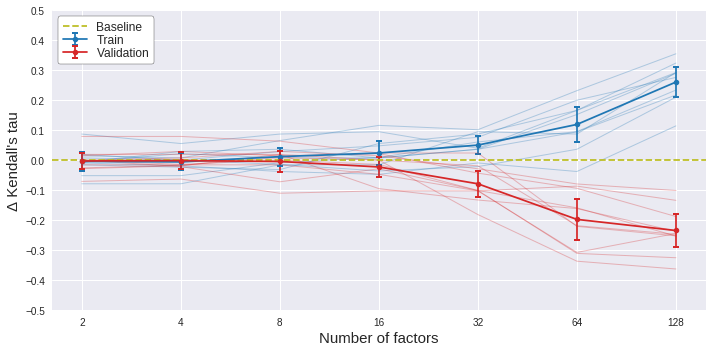

In [1990]:
fig, ax = plt.subplots(figsize=(10, 5))
ci_multiplier = 2.262/np.sqrt(10)

errorbar_opts = {'markeredgewidth': 2, 'capsize': 3}

# Plot differences in RMSE from baseline for both models
for _, row in dtaus_train_all.iterrows():
    ax.plot(range(len(n_factors)), row, lw=1, color='tab:blue', alpha=0.3, label='_nolegend_')
ax.errorbar(range(len(n_factors)), dtaus_train_all.mean(axis=0), 
             yerr=ci_multiplier*dtaus_train_all.std(axis=0),
           fmt='.-', color='tab:blue', label='Train', **errorbar_opts)

for _, row in dtaus_val_all.iterrows():
    ax.plot(range(len(n_factors)), row, lw=1, color='tab:red', alpha=0.3, label='_nolegend_')
ax.errorbar(range(len(n_factors)), dtaus_val_all.mean(axis=0), 
             yerr=ci_multiplier*dtaus_val_all.std(axis=0),
           fmt='.-', color='tab:red', label='Validation', **errorbar_opts)

ax.axhline(0, ls='--', color='tab:olive', label='Baseline')
ax.legend(**legend_opts)

ax.set_xticks(range(len(n_factors)))
ax.set_xticklabels(n_factors)
ax.set_yticks(np.arange(-0.5, 0.51, 0.1))
ax.set_xlabel('Number of factors', fontsize=15)
ax.set_ylabel("Δ Kendall's tau", fontsize=15)

plt.tight_layout()
# fig.savefig('viz/factors_vs_dtau.png')

### Early stopping

In [2491]:
n_factors = 2**np.arange(1, 8)
n_iters = np.arange(0, 1001, 20)
stacked_X1_all = {}
stacked_X2_all = {}

In [2511]:
def train_sequential_multi_log(season_scores, n_factor, skater_order=None, init_seed=42,
             alpha=0.0005, n_iter=1000, verbose=True, log_values=False):
    '''
    Run gradient descent on some season scores table (long format)
    Return skater and event scores (along with final RMSE and other intermediate values if needed)'''

    season_pivot = pd.pivot_table(season_scores[['name', 'event', 'score']], values='score', index='name', columns='event')
    
    if skater_order is not None:
        season_pivot = season_pivot.loc[skater_order]
        
    skater_names = list(season_pivot.index)
    event_names = list(season_pivot.columns)
    true_scores = season_pivot.values
    
    multi_skater_scores = []
    multi_event_scores = []
    multi_baselines = []
    all_residuals = []
    
    for seed, factor in enumerate(range(n_factor)):
        random_state = np.random.RandomState(init_seed+seed)
        skater_scores = random_state.random_sample((true_scores.shape[0], 1))
        event_scores = random_state.random_sample((1, true_scores.shape[1]))
        baseline = random_state.random_sample()
        residuals = true_scores.copy()
        
        for i in range(n_iter):
            # Calculate predicted scores and residuals
            predicted_scores = skater_scores @ event_scores + baseline
            residuals = predicted_scores - true_scores

            # Calculate parameter gradients
            skater_gradients = np.nansum(residuals * event_scores, axis=1, keepdims=True)
            event_gradients = np.nansum(residuals * skater_scores, axis=0, keepdims=True)
            baseline_gradient = np.nansum(residuals)

            # Update parameters
            event_scores = event_scores - alpha * event_gradients
            skater_scores = skater_scores - alpha * skater_gradients
            baseline = baseline - alpha * baseline_gradient            
        
        
            # Print difference in RMSE for last two iterations
            if verbose and i == (n_iter-1):
                rmse_old = np.sqrt(np.nanmean(residuals**2))
                residuals = skater_scores @ event_scores + baseline - true_scores
                rmse_new = np.sqrt(np.nanmean(residuals**2))
                print(f'Factor: {factor}, Alpha: {alpha}, Iter: {n_iter}, Last RMSE: {round(rmse_new, 3)}, Delta RMSE: {round(rmse_new - rmse_old, 10)}')

        multi_skater_scores.append(skater_scores.ravel())
        multi_event_scores.append(event_scores.ravel())
        multi_baselines.append(baseline)
        
        true_scores = -residuals
        
    multi_skater_scores = pd.DataFrame(multi_skater_scores).T
    multi_skater_scores.index = skater_names
    
    multi_event_scores = pd.DataFrame(multi_event_scores)
    multi_event_scores.columns = event_names
    
    if log_values:
        return season_pivot, all_residuals, multi_baselines, multi_event_scores, multi_skater_scores
    else:
        return multi_skater_scores

In [2514]:
for n_factor in n_factors:
    for n_iter in n_iters:
        print(f'{n_factor} factors, {n_iter} iters')
        for year in (years1 + years2):
            
            # Step 1: train multi-factor model
            season_scores, world_scores = get_yearly_scores(year, all_season_scores, all_world_scores)
            skater_scores = train_sequential_multi_log(season_scores, n_factor, alpha=0.0005, n_iter=n_iter, verbose=False)

            # Normalize and take pairwise differences
            skater_scores = skater_scores.reindex(world_scores.index).dropna()
            normed_skater_scores = (skater_scores - skater_scores.mean(axis=0)) / skater_scores.std(axis=0)
            X = np.array(list(skater1 - skater2 for skater1, skater2 in combinations(normed_skater_scores.values, 2)))

            # Store difference matrices for each year
            if year in years1:
                X1[year] = X
            else:
                X2[year] = X

        # Stack predictor matrices for both folds
        stacked_X1 = np.concatenate(list(X1.values()))
        stacked_X2 = np.concatenate(list(X2.values()))
        
        stacked_X1_all[(n_factor, n_iter)] = stacked_X1
        stacked_X2_all[(n_factor, n_iter)] = stacked_X2

2 factors, 0 iters
2 factors, 20 iters
2 factors, 40 iters
2 factors, 60 iters
2 factors, 80 iters
2 factors, 100 iters
2 factors, 120 iters
2 factors, 140 iters
2 factors, 160 iters
2 factors, 180 iters
2 factors, 200 iters
2 factors, 220 iters
2 factors, 240 iters
2 factors, 260 iters
2 factors, 280 iters
2 factors, 300 iters
2 factors, 320 iters
2 factors, 340 iters
2 factors, 360 iters
2 factors, 380 iters
2 factors, 400 iters
2 factors, 420 iters
2 factors, 440 iters
2 factors, 460 iters
2 factors, 480 iters
2 factors, 500 iters
2 factors, 520 iters
2 factors, 540 iters
2 factors, 560 iters
2 factors, 580 iters
2 factors, 600 iters
2 factors, 620 iters
2 factors, 640 iters
2 factors, 660 iters
2 factors, 680 iters
2 factors, 700 iters
2 factors, 720 iters
2 factors, 740 iters
2 factors, 760 iters
2 factors, 780 iters
2 factors, 800 iters
2 factors, 820 iters
2 factors, 840 iters
2 factors, 860 iters
2 factors, 880 iters
2 factors, 900 iters
2 factors, 920 iters
2 factors, 940 iter

In [2567]:
np.save('data/stacked_X1_all.npy', stacked_X1_all)
np.save('data/stacked_X2_all.npy', stacked_X2_all)

In [2515]:
cum_len1 = 0
cum_len2 = 0
all_lens1 = {}
all_lens2 = {}
for year in (years1 + years2):

    # Step 1: train multi-factor model
    season_scores, world_scores = get_yearly_scores(year, all_season_scores, all_world_scores)
    skater_scores = train_sequential_multi_log(season_scores, n_factor, alpha=0.0005, n_iter=1, verbose=False)

    # Normalize and take pairwise differences
    skater_scores = skater_scores.reindex(world_scores.index).dropna()
    normed_skater_scores = (skater_scores - skater_scores.mean(axis=0)) / skater_scores.std(axis=0)
    X = np.array(list(skater1 - skater2 for skater1, skater2 in combinations(normed_skater_scores.values, 2)))
    if year in years1:
        all_lens1[year] = cum_len1, cum_len1 + len(X)
        cum_len1 += len(X)
    else:
        all_lens2[year] = cum_len2, cum_len2 + len(X)
        cum_len2 += len(X)

In [2516]:
avg_dtaus_train_seq = {}
avg_dtaus_val_seq = {}

for (n_factor, multi_iter), stacked_X1 in stacked_X1_all.items():
    print(f'{n_factor} factors, {multi_iter} iters')
    stacked_X2 = stacked_X2_all[(n_factor, multi_iter)]
    log_gen1 = log_gradient_ascent_log(stacked_X1, alpha=0.0005, n_iter=1001, log_every=20, verbose=True)
    log_gen2 = log_gradient_ascent_log(stacked_X2, alpha=0.0005, n_iter=1001, log_every=20, verbose=True)

    for log_log1, log_log2 in zip(log_gen1, log_gen2):
        log_iter = log_log1[0]
        beta1 = log_log1[1]
        beta2 = log_log2[1]

        dtaus_train = {}
        dtaus_val = {}
        for year in years1:
            year_start, year_end = all_lens1[year]
            dtaus_train[year] = get_tau_from_X_beta(stacked_X1[year_start:year_end, :], beta1) - avg_taus[year]
            dtaus_val[year] = get_tau_from_X_beta(stacked_X1[year_start:year_end, :], beta2) - avg_taus[year]
        for year in years2:
            year_start, year_end = all_lens2[year]
            dtaus_train[year] = get_tau_from_X_beta(stacked_X2[year_start:year_end, :], beta2) - avg_taus[year]
            dtaus_val[year] = get_tau_from_X_beta(stacked_X2[year_start:year_end, :], beta1) - avg_taus[year]

        avg_dtaus_train_seq[(n_factor, multi_iter, log_iter)] = np.mean(list(dtaus_train.values()))
        avg_dtaus_val_seq[(n_factor, multi_iter, log_iter)] = np.mean(list(dtaus_val.values()))

2 factors, 0 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.68, Delta LL: 0.0
2 factors, 20 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.36, Delta LL: 0.0
2 factors, 40 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
2 factors, 60 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
2 factors, 80 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
2 factors, 100 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
2 factors, 120 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
2 factors, 140 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
2 factors, 160 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
2 factors, 180 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
2 factors, 200 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
2 factors, 220 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
2 factors, 240 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta 

Alpha: 0.0005, Iter: 1000, Last LL: -0.34, Delta LL: 0.0
8 factors, 80 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.34, Delta LL: 0.0
8 factors, 100 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.34, Delta LL: 0.0
8 factors, 120 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.34, Delta LL: 0.0
8 factors, 140 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.34, Delta LL: 0.0
8 factors, 160 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.34, Delta LL: 0.0
8 factors, 180 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.34, Delta LL: 0.0
8 factors, 200 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.34, Delta LL: 0.0
8 factors, 220 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
8 factors, 240 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
8 factors, 260 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
8 factors, 280 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
8 factors, 300 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.35, Delta LL: 0.0
8 factor

Alpha: 0.0005, Iter: 1000, Last LL: -0.29, Delta LL: 0.0
32 factors, 140 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.29, Delta LL: 0.0
32 factors, 160 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.29, Delta LL: 0.0
32 factors, 180 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.29, Delta LL: 0.0
32 factors, 200 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.29, Delta LL: 0.0
32 factors, 220 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.29, Delta LL: 0.0
32 factors, 240 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.28, Delta LL: 0.0
32 factors, 260 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.28, Delta LL: 0.0
32 factors, 280 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.28, Delta LL: 0.0
32 factors, 300 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.28, Delta LL: 0.0
32 factors, 320 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.28, Delta LL: 0.0
32 factors, 340 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.28, Delta LL: 0.0
32 factors, 360 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.28, Delta LL:

Alpha: 0.0005, Iter: 1000, Last LL: -0.14, Delta LL: 3.389e-05
128 factors, 100 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.13, Delta LL: 3.46081e-05
128 factors, 120 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.13, Delta LL: 3.65725e-05
128 factors, 140 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.12, Delta LL: 3.80175e-05
128 factors, 160 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.11, Delta LL: 3.79535e-05
128 factors, 180 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.11, Delta LL: 3.743e-05
128 factors, 200 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.12, Delta LL: 3.60484e-05
128 factors, 220 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.12, Delta LL: 3.36397e-05
128 factors, 240 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.13, Delta LL: 3.15689e-05
128 factors, 260 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.13, Delta LL: 3.18494e-05
128 factors, 280 iters
Alpha: 0.0005, Iter: 1000, Last LL: -0.13, Delta LL: 3.3054e-05
128 factors, 300 iters
Alpha: 0.0005, Iter: 1000, Last LL: -

In [2518]:
for n_factor in n_factors:
    max_tau = -10
    for key, tau in avg_dtaus_train_seq.items():
        if key[0]==n_factor and tau > max_tau:
            max_tau = tau
            max_tau_multi_iter = key[1]
            max_tau_log_iter = key[2]
    print(n_factor, max_tau, ':', max_tau_multi_iter, max_tau_log_iter)

2 0.006075663466967818 : 40 40
4 0.008050065876152845 : 160 40
8 0.02693581780538302 : 140 20
16 0.040382081686429525 : 200 40
32 0.07036702428006776 : 300 320
64 0.13930171277997366 : 360 840
128 0.2619649915302089 : 720 980


In [2517]:
for n_factor in n_factors:
    max_tau = -10
    for key, tau in avg_dtaus_val_seq.items():
        if key[0]==n_factor and tau > max_tau:
            max_tau = tau
            max_tau_multi_iter = key[1]
            max_tau_log_iter = key[2]
    print(n_factor, max_tau, ':', max_tau_multi_iter, max_tau_log_iter)

2 0.0053020892151327105 : 40 60
4 0.00730848861283645 : 40 20
8 -0.003975155279503095 : 980 40
16 -0.01238848108413324 : 500 20
32 -0.057069452286843604 : 460 40
64 -0.07840579710144926 : 580 120
128 -0.16571616789008092 : 540 460


Plot heatmaps

In [2555]:
all_avg_dtaus_train_seq[2].loc[0, 20]

-0.5433634481460569

In [2557]:
avg_dtaus_train_seq[(2, 0, 20)]

-0.5433634481460569

In [2554]:
all_avg_dtaus_train_seq = {}

for n_factor in n_factors:
    tau_matrix = []
    for multi_iter in range(0, 1001, 20):
        tau_row = []
        for log_iter in range(0, 1001, 20):
            tau_row.append(avg_dtaus_train_seq[(n_factor, multi_iter, log_iter)])
        tau_matrix.append(tau_row)
    tau_matrix = pd.DataFrame(tau_matrix, index=range(0, 1001, 20), columns=range(0, 1001, 20))
    all_avg_dtaus_train_seq[n_factor] = tau_matrix

In [2558]:
all_avg_dtaus_val_seq = {}

for n_factor in n_factors:
    tau_matrix = []
    for multi_iter in range(0, 1001, 20):
        tau_row = []
        for log_iter in range(0, 1001, 20):
            tau_row.append(avg_dtaus_val_seq[(n_factor, multi_iter, log_iter)])
        tau_matrix.append(tau_row)
    tau_matrix = pd.DataFrame(tau_matrix, index=range(0, 1001, 20), columns=range(0, 1001, 20))
    all_avg_dtaus_val_seq[n_factor] = tau_matrix

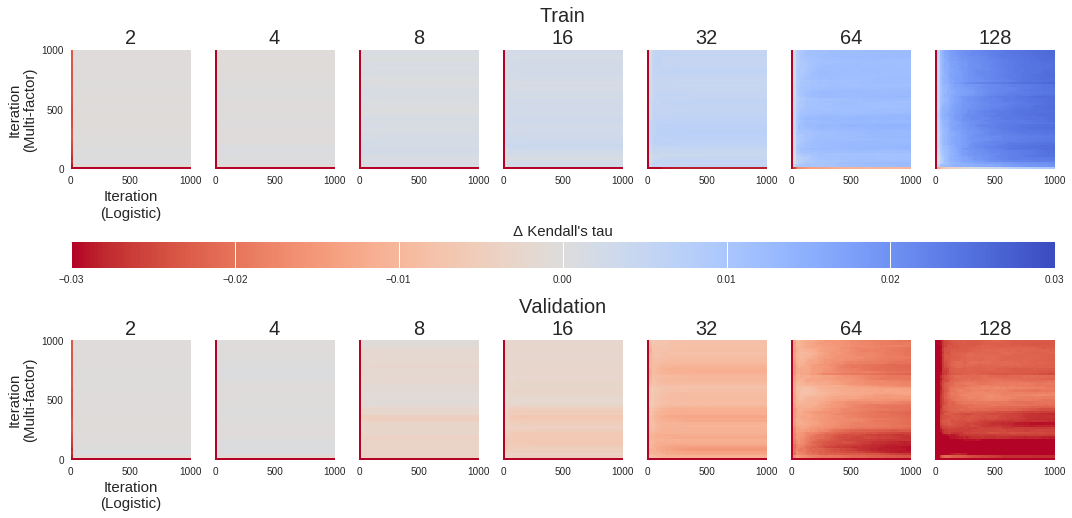

In [2560]:
fig = plt.figure(figsize=(15, 8))
grid = plt.GridSpec(21, len(n_factors), hspace=0)

for i, (n_factor, taus) in enumerate(all_avg_dtaus_train_seq.items()):
    if i == 0:
        ax = fig.add_subplot(grid[:10, i])
        ax.imshow(taus.iloc[::-1, :], cmap='coolwarm_r', vmin=-0.3, vmax=0.3, extent=[0, 1000, 0, 1000])
        ax.set_yticks([0, 500, 1000])
        ax.grid(None)
        ax.set_xlabel('Iteration\n(Logistic)', fontsize=15)
        ax.set_ylabel('Iteration\n(Multi-factor)', fontsize=15)
        ax.set_title(f'{n_factor}', fontsize=20)
    else:
        ax1 = fig.add_subplot(grid[:10, i])
        ax1.imshow(taus.iloc[::-1, :], cmap='coolwarm_r', vmin=-0.3, vmax=0.3, extent=[0, 1000, 0, 1000])
        ax1.set_yticks([])
        ax1.grid(None)
        if i == 3:
            ax1.set_title(f'Train\n{n_factor}', fontsize=20)
        else:
            ax1.set_title(f'{n_factor}', fontsize=20)
        

for i, (n_factor, taus) in enumerate(all_avg_dtaus_val_seq.items()):
    if i == 0:
        ax = fig.add_subplot(grid[11:, i])
        ax.imshow(taus.iloc[::-1, :], cmap='coolwarm_r', vmin=-0.3, vmax=0.3, extent=[0, 1000, 0, 1000])
        ax.set_yticks([0, 500, 1000])
        ax.grid(None)
        ax.set_xlabel('Iteration\n(Logistic)', fontsize=15)
        ax.set_ylabel('Iteration\n(Multi-factor)', fontsize=15)
        ax.set_title(f'{n_factor}', fontsize=20)
    else:
        ax1 = fig.add_subplot(grid[11:, i])
        ax1.imshow(taus.iloc[::-1, :], cmap='coolwarm_r', vmin=-0.3, vmax=0.3, extent=[0, 1000, 0, 1000])
        ax1.set_yticks([])
        ax1.grid(None)
        if i == 3:
            ax1.set_title(f'Validation\n{n_factor}', fontsize=20)
        else:
            ax1.set_title(f'{n_factor}', fontsize=20)

axc = fig.add_subplot(grid[10, :])
cmap = plt.cm.get_cmap('coolwarm_r')
colors = cmap(np.arange(cmap.N))
axc.imshow([colors], extent=[-0.03, 0.03, 0, 0.01], aspect='auto')
axc.set_yticks([])
axc.set_title("Δ Kendall's tau", fontsize=15)

plt.tight_layout()
plt.show()

# fig.savefig('viz/train_val_3_params.png')